<h1 style='text-align:center;color:lightblue'><b>Supermarket Customers Analysis</b></h1>


### **INTRODUCTION**
Even though Supermarket can choose to remain a physical store or enter the ever-growing world of e-commerce, Supermarket remains popular in terms of retail sales, especially shopping for groceries and household necessities. Understanding client behavior is essential in the retail market so that organizations can adjust their marketing offers and campaigns accordingly. As a first step, the Supermarket asked the Data Analyst team to conduct analysis on customer data owned by the Supermarket.

The data provided is a Dataset of Customers who have subscribed to the Supermarket in the period 2012 to 2014. The data set consists of customer data points, each of which represents a unique consumer interaction with the supermarket. This includes a variety of characteristics, such as demographic information, shopping patterns, response to marketing campaigns, and so on.

The data set, containing more than 2,000 items, provides a very useful source of information for analyzing customer relationship dynamics in the supermarket context.

### **PROBLEM STATEMENTS**

By analyzing customer behavior over the last two years in Supermarket, `Market Strategy` will be formulated to help Supermarket businesses adapt their products based on target customers from various types of customers. The core objective of this project is to drive the formulation of market strategies by analyzing `Customer Shopping Behavior` and to improve the effectiveness of campaigns. Additionally, the company seeks to understand customer segmentation and identify potential areas for growth and development. This information will play an important role in designing more strategic and effective campaigns in the future.

`Key Question:`<br>
1. What insights can we gain into customers purchasing behavior based on their demographic information?<br>
2. What potential areas can be developed or improved for future campaigns and sales?<br>
3. How does the Supermarket perform in building its marketing strategy?

### **STAKEHOLDER**

##### `Store Manager and Marketing Teams of Supermarket` 
---

### *`DATA UNDERSTANDING`*

Supermarket Customers dataset has 2240 rows and 29 columns

#### **Supermarket Customers Data Dictionary**


**People**

|Column Name (People)| Description|
|----------|------------|
|ID | Customer's unique identifier|
|Year_Birth | Customer's birth year|
|Education | Customer Education Level|
|Marital_Status | Customer's marital status|
|Income | Customer's yearly household income|
|Kidhome | Number of children in customer's household|
|Teenhome | Number of teenagers in customer's household|
|Dt_Customer | Date of customer's enrollment with the company|
|Recency | Number of days since customer's last purchase|
|Complain | 1 if the customer complained in the last 2 years, 0 otherwise|

**Products**

|Column Name (Product)| Description|
|----------|------------|
|MntWines | Amount spent on wine in last 2 years|
|MntFruits | Amount spent on fruits in last 2 years|
|MntMeatProducts | Amount spent on meat in last 2 years|
|MntFishProducts | Amount spent on fish in last 2 years|
|MntSweetProducts | Amount spent on sweets in last 2 years|
|MntGoldProds | Amount spent on gold in last 2 years| 

**Promotion**

|Column Name (Promotion)| Description|
|----------|------------|
|NumDealsPurchases | Number of purchases made with a discount|
|AcceptedCmp1 | 1 if the customer accepted the offer in the 1st campaign, 0 otherwise|
|AcceptedCmp2 | 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise|
|AcceptedCmp3 | 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise|
|AcceptedCmp4 | 1 if the customer accepted the offer in the 4th campaign, 0 otherwise|
|AcceptedCmp5 | 1 if the customer accepted the offer in the 5th campaign, 0 otherwise|
|Response | 1 if the customer accepted the offer in the last campaign, 0 otherwise|

**Place**

|Column Name (Place)| Description|
|----------|------------|
|NumWebPurchases | Number of purchases made through the company’s website|
|NumCatalogPurchases | Number of purchases made using a catalog|
|NumStorePurchases | Number of purchases made directly in stores|
|NumWebVisitsMonth | Number of visits to the company’s website in the last month|

To conduct a proper data analysis, it is essential to comprehend the data types associated with each column. Below is the table illustrating the data types along with their corresponding columns:

| Type       | Category  | Columns                                                                                         |
|------------|-----------|------------------------------------------------------------------------------------------------|
| Numerical  | Discrete  | Kidhome, Teenhome, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Recency |
|            | Continuous| Year_Birth, Income                                                                         |
| Categorical| Ordinal   | Education                                                                                       |
|            | Nominal   | Marital_Status |
|            | Nominal(Binary) | Complain, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response|
| Datetime   |           | Dt_Customer  



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import altair as alt
import math
from scipy.stats import normaltest
from category_encoders import OrdinalEncoder

alt.data_transformers.disable_max_rows()
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 100)
df=pd.read_csv('Supermarket Customers.csv', delimiter='\t')
display(df.head(10),df.tail(10))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2230,7004,1984,Graduation,Single,11012.0,1,0,16-03-2013,82,24,3,26,7,1,23,3,3,1,2,9,1,0,0,0,0,0,3,11,0
2231,9817,1970,Master,Single,44802.0,0,0,21-08-2012,71,853,10,143,13,10,20,2,9,4,12,8,0,0,0,0,0,0,3,11,0
2232,8080,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


#### **Checking data type**

In [3]:
print(f'The number of rows and columns in this dataset are: {df.shape}')

pd.DataFrame({
    'parameter': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values*100,
    'null_value': df.isna().sum().values,
    'n_unique': df.nunique().values,
    'neg_value': [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
    '0_value': [True if df[col].dtype == int and (df[col] == 0).any() else False for col in df.columns],
    'duplicate' : df.duplicated().sum()})

The number of rows and columns in this dataset are: (2240, 29)


,parameter,data_type,null_value(%),null_value,n_unique,neg_value,0_value,duplicate
0,ID,int64,0.000000,0,2240,False,True,0
1,Year_Birth,int64,0.000000,0,59,False,False,0
2,Education,object,0.000000,0,5,False,False,0
3,Marital_Status,object,0.000000,0,8,False,False,0
4,Income,float64,1.071429,24,1974,False,False,0
5,Kidhome,int64,0.000000,0,3,False,True,0
6,Teenhome,int64,0.000000,0,3,False,True,0
7,Dt_Customer,object,0.000000,0,663,False,False,0
8,Recency,int64,0.000000,0,100,False,True,0
9,MntWines,int64,0.000000,0,776,False,True,0


#### **Checking Missing Value**

Income has missing values of 1.07%,the annual household income of some customers is not available or not recorded.

In [4]:
filtered_data = df[df['Income'].isnull()]
filtered_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


#### **Checking Duplicate**

Even though there are no exact duplicate rows, it is still possible to have duplicate data with different IDs.

In [5]:
pd.set_option('display.max_rows', None)

duplicated = df.loc[:, df.columns.difference(['ID'])].duplicated(keep='first')
print('The number of duplicate rows is :' ,duplicated.sum())
df[duplicated].sort_values(by=['Year_Birth', 'Education', 'Marital_Status', 'Income'], ascending=True).head(10)

The number of duplicate rows is : 182


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
894,8800,1943,PhD,Divorced,48948.0,0,0,01-02-2013,53,437,8,206,160,49,42,2,7,10,5,6,1,0,0,0,0,0,3,11,1
282,8652,1946,Graduation,Together,37760.0,0,0,31-08-2012,20,84,5,38,150,12,28,2,4,1,6,7,0,0,0,0,0,0,3,11,0
1747,7881,1946,Master,Married,66835.0,0,0,28-09-2013,21,620,26,195,34,17,141,1,6,4,13,2,0,0,0,0,0,0,3,11,0
1771,7592,1946,PhD,Married,51012.0,0,0,18-04-2013,86,102,9,63,2,9,24,1,4,1,4,6,0,0,0,0,0,0,3,11,0
1570,4261,1946,PhD,Single,82800.0,0,0,24-11-2012,23,1006,22,115,59,68,45,1,7,6,12,3,0,0,1,1,0,0,3,11,1
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
1630,3859,1947,PhD,Together,73059.0,0,1,31-08-2013,36,410,112,420,0,82,71,1,9,3,13,4,0,0,0,0,0,0,3,11,0
1634,10906,1948,PhD,Together,46681.0,0,2,08-10-2013,52,269,15,69,15,19,38,2,4,6,4,5,0,0,0,0,0,0,3,11,0
2217,9589,1948,PhD,Widow,82032.0,0,0,05-04-2014,54,332,194,377,149,125,57,0,4,6,7,1,0,0,0,0,0,0,3,11,0
2094,1146,1949,Master,Together,49912.0,0,1,07-09-2012,5,520,8,223,32,49,42,4,10,5,7,8,1,0,0,0,0,0,3,11,1


#### **Data Structure**

In [6]:
display(df.describe().transpose(), df.describe(include='object'))

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


#### **Checking Unique Sample of Each Column**

In [7]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns : 
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tableDesc = pd.DataFrame(columns = ['Column Name', 'Number of Unique', 'Unique Sample'], 
                         data=listItem)
tableDesc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

### **Observations**

Based on a preliminary review of the data, we have identified several issues that require further attention:

*Missing Values*:
* There is a missing value in the `Income` column, which constitutes 1.07% or 24 data of all values. Addressing this missing value is crucial as the income column is one of the key variables for our data analysis which will fill in later.

*Duplicates*:
* There are multiple instances of duplicated data with different IDs.

*Outliers*:
* Initial data structure indicate the presence of outliers such as `Year of birth` of the customer ranges from 1893 to 1996 and customer `Income` ranges from 1,730 to 666,666 dollars. These outliers should be confirmed through visualization.

*Wrong Data Type Format*:
* The `Dt_Customer` is currently in the incorrect data type format. It is currently in an object form when it should be in datetime format.

*Redundant Values in Categorical Columns*:
* The `Marital_Status` column has numerous categories that could be simplified such as Alone and Divorced are both Alone. Some of these categories can be grouped together.
* In the `Education` column, "master degree" and "2nd cycle" have the same meaning and can be combined.

*Unused Columns*:
* `Z_CostContact` and `Z_Revenue` have identical values across all rows. Since they will not be utilized in the analysis, they will be dropped.


___

### *`DATA PREPARATION`*

#### **Renaming Several Column**

In [8]:
df = df.rename(columns={
        'Marital_Status'        : 'Status',
        'MntWines'              : 'Wine',
        'MntFruits'             : 'Fruit',
        'MntMeatProducts'       : 'Meat',
        'MntFishProducts'       : 'Fish',
        'MntSweetProducts'      : 'Sweet',
        'MntGoldProds'          : 'Gold',
        'NumDealsPurchases'     : 'Deals_Purchase',
        'NumWebPurchases'       : 'Web_Purchase',
        'NumCatalogPurchases'   : 'Catalog_Purchase',
        'NumStorePurchases'     : 'Store_Purchase',
        'NumWebVisitsMonth'     : 'Web_Visit',
        'Response'              : 'Latest_Cmp'
        })

#### **Checking Outliers with Vizualization**

In [9]:
numerical_columns = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 
            'Recency', 'Wine', 'Fruit', 'Meat',
            'Fish', 'Sweet', 'Gold',
            'Deals_Purchase', 'Web_Purchase', 'Catalog_Purchase',
            'Store_Purchase', 'Web_Visit', 'Z_CostContact', 'Z_Revenue']

* Boxplot

<function matplotlib.pyplot.show(close=None, block=None)>

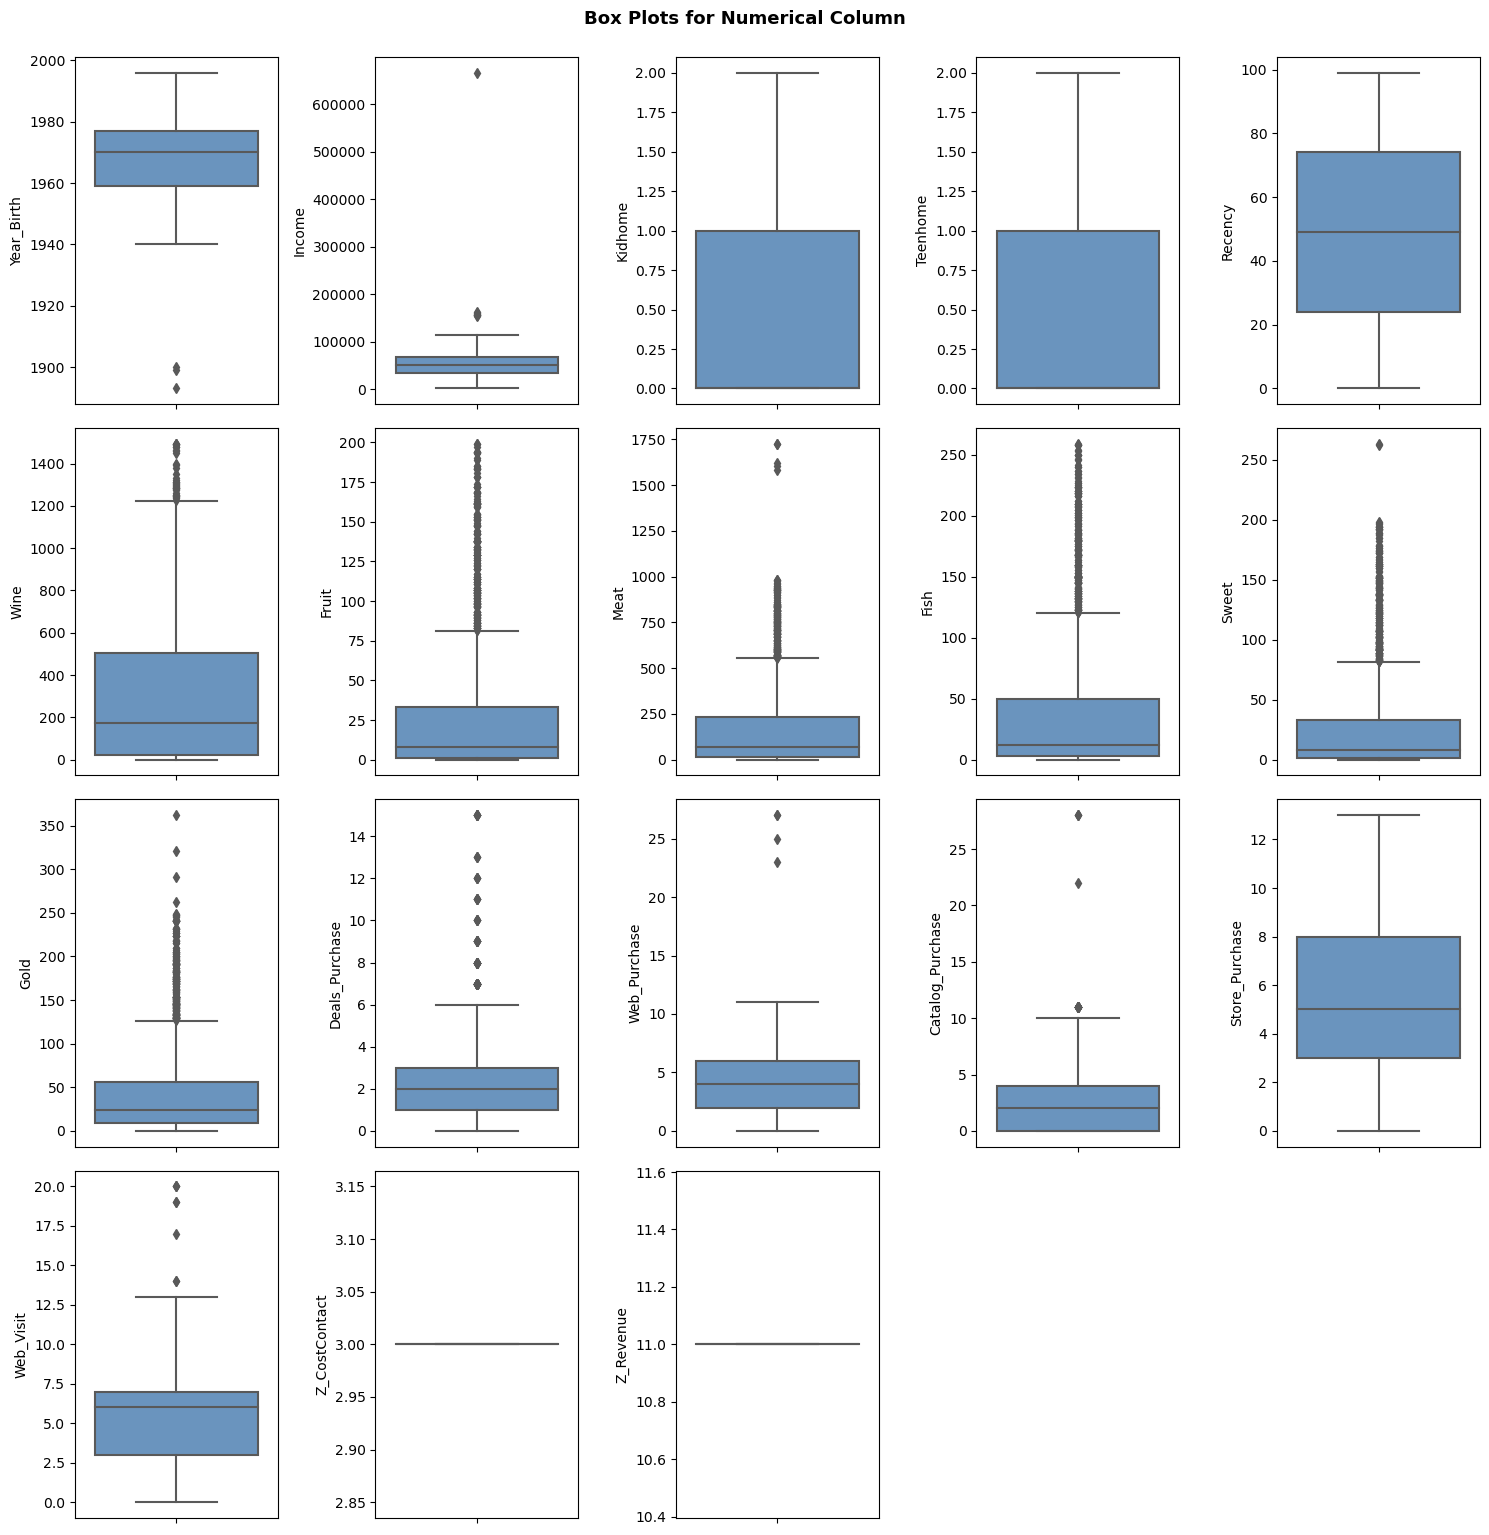

In [10]:
plt.figure(figsize=(15, 15))
n = 4
for i in range(0, len(numerical_columns)):
    plt.subplot(n, math.ceil(len(numerical_columns)/n), i+1)
    sns.boxplot(y=df[numerical_columns[i]], color='#5c94cc', orient='v')
    plt.tight_layout()

plt.suptitle('Box Plots for Numerical Column', fontsize=13, y=1.02, fontweight='bold')
plt.show

In [11]:
lower_whisker = []
upper_whisker = []
is_outlier = []
n_outlier = []
non_outlier = []

for i in numerical_columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (IQR * 1.5)
    upper = Q3 + (IQR * 1.5)

    outlier_filter = (df[i] >= lower) & (df[i] <= upper)
    lower_whisker.append(lower)
    upper_whisker.append(upper)
    is_outlier.append(df[i][~outlier_filter].any())
    n_outlier.append(len(df[~outlier_filter]))
    non_outlier.append(len(df[outlier_filter]))

pd.DataFrame({
    'Column Name' : numerical_columns,
    'Is_outlier' : is_outlier,
    'Lower Whisker' : lower_whisker,
    'Upper Whisker' : upper_whisker, 
    'Outlier' : n_outlier,
    'Non Outlier' : non_outlier
})

,Column Name,Is_outlier,Lower Whisker,Upper Whisker,Outlier,Non Outlier
0,Year_Birth,True,1932.0,2004.0,3,2237
1,Income,True,-14525.5,118350.5,32,2208
2,Kidhome,False,-1.5,2.5,0,2240
3,Teenhome,False,-1.5,2.5,0,2240
4,Recency,False,-51.0,149.0,0,2240
5,Wine,True,-697.0,1225.0,35,2205
6,Fruit,True,-47.0,81.0,227,2013
7,Meat,True,-308.0,556.0,175,2065
8,Fish,True,-67.5,120.5,223,2017
9,Sweet,True,-47.0,81.0,248,1992


This information will be used later for ouliers handling in data cleaning process.

* Histogram 

<Figure size 1500x1500 with 0 Axes>

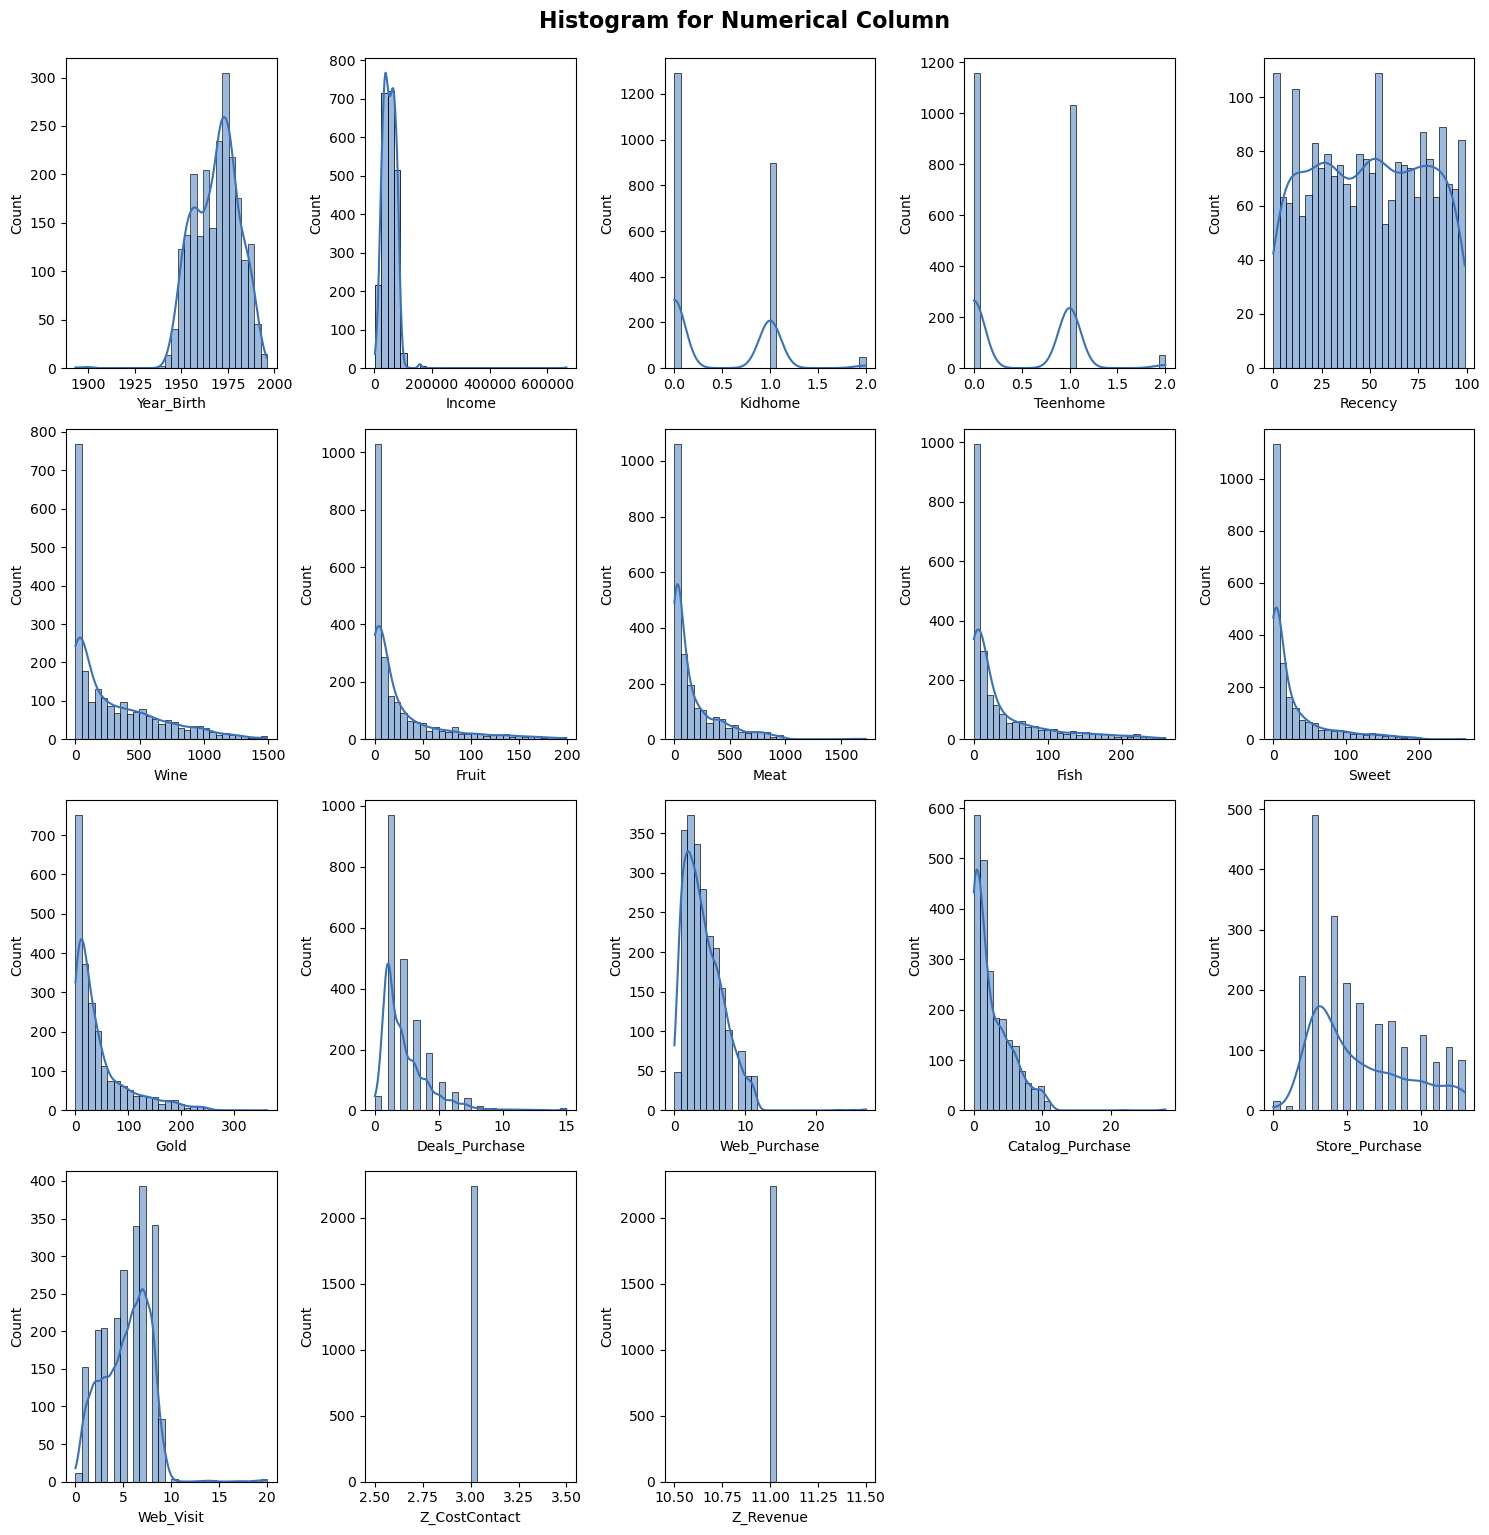

<Figure size 1500x1500 with 0 Axes>

In [12]:
plt.figure(figsize=(15, 15))
n = 4
for i in range(0, len(numerical_columns)):
    plt.subplot(n, math.ceil(len(numerical_columns)/n), i+1)
    sns.histplot(df[numerical_columns[i]], color='#3972bc', bins=30, kde=True)
    plt.tight_layout()

plt.suptitle('Histogram for Numerical Column', fontsize=16, y=1.02, fontweight='bold')
plt.show

plt.figure(figsize=(15, 15))

Based on the boxplot and histogram above, it can be concluded that the data has many outliers and is included in the right skewed category

---

### *`DATA CLEANING`*

#### **Changing Data Type**

In [13]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                2240 non-null   int64         
 1   Year_Birth        2240 non-null   int64         
 2   Education         2240 non-null   object        
 3   Status            2240 non-null   object        
 4   Income            2216 non-null   float64       
 5   Kidhome           2240 non-null   int64         
 6   Teenhome          2240 non-null   int64         
 7   Dt_Customer       2240 non-null   datetime64[ns]
 8   Recency           2240 non-null   int64         
 9   Wine              2240 non-null   int64         
 10  Fruit             2240 non-null   int64         
 11  Meat              2240 non-null   int64         
 12  Fish              2240 non-null   int64         
 13  Sweet             2240 non-null   int64         
 14  Gold              2240 n

#### **Drop Duplicates**

In [15]:
df=df.drop_duplicates(subset=df.columns.difference(['ID']), keep='first')

#### **Drop Unused Columns**

In [16]:
#drop Z_CostContact
df = df.drop(columns="Z_CostContact")

#drop Z_Revenue
df = df.drop(columns="Z_Revenue")
df.head()

,ID,Year_Birth,Education,Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wine,Fruit,Meat,Fish,Sweet,Gold,Deals_Purchase,Web_Purchase,Catalog_Purchase,Store_Purchase,Web_Visit,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Latest_Cmp
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


#### **Handling Outliers and Missing Values**

Removes ages older than 100 years from the Year_Birth column

<Axes: xlabel='Year_Birth'>

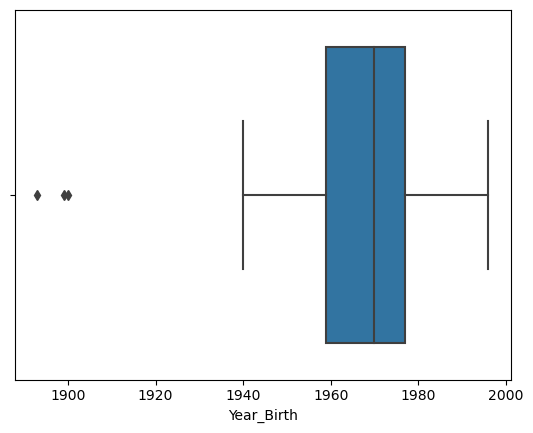

In [17]:
sns.boxplot(data=df, x="Year_Birth")

In [18]:
df[["Year_Birth"]].sort_values("Year_Birth").head()

,Year_Birth
239,1893
339,1899
192,1900
1950,1940
424,1941


In [19]:
df[df['Year_Birth']<1914] #misalkan usia maksimal sampai 100 tahun


,ID,Year_Birth,Education,Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wine,Fruit,Meat,Fish,Sweet,Gold,Deals_Purchase,Web_Purchase,Catalog_Purchase,Store_Purchase,Web_Visit,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Latest_Cmp
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0


In [20]:
df.drop(192,axis=0,inplace=True)
df.drop(239,axis=0,inplace=True)
df.drop(339,axis=0,inplace=True)

<Axes: xlabel='Income'>

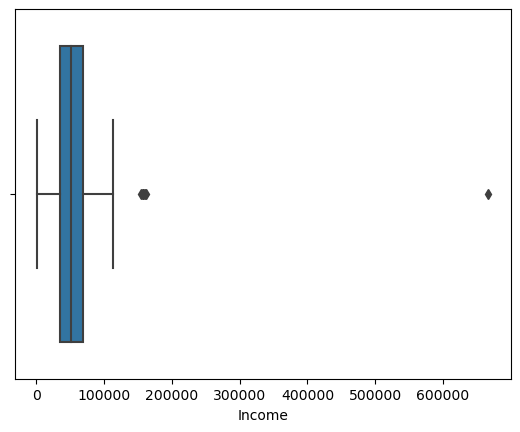

In [21]:
sns.boxplot(data=df, x="Income")

In [22]:
# Calculate the IQR for the column
Q1 = df["Income"].quantile(0.25)
Q3 = df["Income"].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Income"] < lower_bound) | (df["Income"] > upper_bound)]
outliers

,ID,Year_Birth,Education,Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wine,Fruit,Meat,Fish,Sweet,Gold,Deals_Purchase,Web_Purchase,Catalog_Purchase,Store_Purchase,Web_Visit,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Latest_Cmp
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0


<div class="alert alert-block alert-success">
<b>Note:</b> <span style='color:#0000FF'>Income</span> between upper bound to below 200k can be classified normal since most of them are Postgraduate, Also living with their partner and families

However, Income above 200k is very odd and will be removed
</div>

In [23]:
#drop outliers
df = df[df['Income'] < 200000]

In [24]:
df['Income'].describe()

count      2030.000000
mean      52043.708374
std       21591.436561
min        1730.000000
25%       35461.500000
50%       51523.500000
75%       68445.750000
max      162397.000000
Name: Income, dtype: float64

In [25]:
df['Income'].skew()

0.3672384470738135

<Axes: xlabel='Year_Birth'>

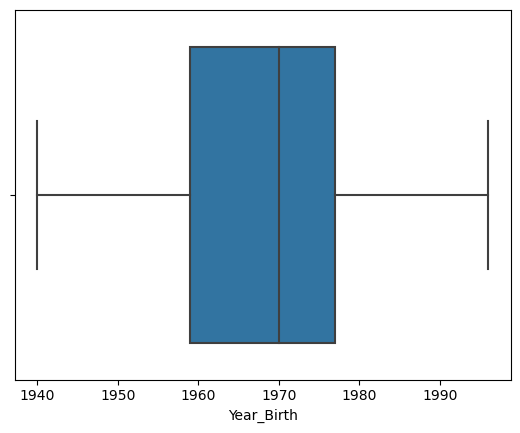

In [26]:
sns.boxplot(data=df, x="Year_Birth")

In [27]:
df['Year_Birth'].describe()

count    2030.000000
mean     1968.904433
std        11.665484
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

**Changing Redundant Values**

* Education

In [28]:
df["Education"].value_counts()

Graduation    1018
PhD            444
Master         336
2n Cycle       183
Basic           49
Name: Education, dtype: int64

Change "2n Cycle" to "Master", here is the [link](https://www.studera.nu/startpage/higher-education/sweden/levels-degrees/#;h21)

In [29]:
df["Education"].replace("2n Cycle", "Master", inplace=True)

In [30]:
df["Education"].value_counts()

Graduation    1018
Master         519
PhD            444
Basic           49
Name: Education, dtype: int64

* Marital Status

In [31]:
df["Status"].value_counts()

Married     788
Together    512
Single      438
Divorced    215
Widow        70
Alone         3
Absurd        2
YOLO          2
Name: Status, dtype: int64

* Status columns will be simplified into 2 categories which are Unpartnered and Partnered

In [32]:
df['Status'] = df['Status'].replace({'Single'   : 'Unpartenered',
                                    'Divorced'  : 'Unpartenered', 
                                    'Widow'     : 'Unpartenered',
                                    'Alone'     : 'Unpartenered',
                                    'Absurd'    : 'Unpartenered',
                                    'YOLO'      : 'Unpartenered',
                                    'Together'  : 'Partnered',
                                    'Married'   : 'Partnered'})

**Fill income missing value with Income median by Education**
- I fill in the missing values of income based on the median of education,
 because usually the higher a person's education level, the higher their income

In [33]:
df.groupby('Education')[['Income']].median()

,Income
Education,
Basic,20194.0
Graduation,52224.5
Master,49618.0
PhD,55005.0


In [34]:
df["Income"] = df["Income"].fillna(df.groupby("Education")["Income"].transform("median"))

In [35]:
df["Income"].isna().sum()

0

#### **Adding Columns**

In [36]:
mappings = [ {'col': 'Status', 'mapping':{'Partnered': 2, 'Unpartenered': 1}}]

ordinal_encoder = OrdinalEncoder(cols=['Status'], mapping=mappings)
df = ordinal_encoder.fit_transform(df)

# create FamilySize column
FamilyQty = df['Kidhome'] + df['Teenhome'] + df['Status']

In [37]:
df.insert(8, 'FamilyQty', FamilyQty)

In [38]:
df.drop(columns=['Kidhome', 'Teenhome', 'Status'], inplace=True)

* Add Age Column

I will discretize the continuous values through binning. Before performing binning, I will compute the customer's age by subtracting the "Year_Birth" from the latest "Dt_Customer" date which represents the meantime.  

In [39]:
Age = (df['Dt_Customer'].dt.year.max()) - df['Year_Birth']
df.insert(2, column='Age', value=Age)

* Add Generation Column

I classify Year_Birth by generation as well
1. Silent Generation: Born before 1946
2. Baby Boomer: Born around 1946 to 1964.
3. Generation X: Born around 1965 to 1980.
4. Generation Y (Millennials): Born around 1981 to 1996.
5. Generation Z: Born after 1996.

source: https://en.wikipedia.org/wiki/Generation

In [40]:
bins = [1928, 1946, 1964, 1980, 1996]
labels = ['Silent Gen', 'Baby Boomer', 'Gen X', 'Millennials']

# Apply binning to the 'Age' column
Generation = pd.cut(df['Year_Birth'], bins=bins, labels=labels, right=False)
df.insert(3, 'Generation', Generation)

In [41]:
df['Generation'].isna().sum()

2

In [42]:
df = df.dropna(subset=['Generation'])

In [43]:
df['Generation'].isna().sum()

0

* Add Total Amount

Add a Total_Amount Column by adding all the amounts spent by customers from each product category so that we can find out the total Total Amount spent by each customer at the Supermarket.

In [44]:
total_amount= df['Wine'] + df['Fruit'] + df['Meat'] + df['Fish'] + df['Sweet'] + df['Gold']
df.insert(15, column='Total_Amount', value=total_amount)

* Add Frequency Purchase

Added Freq_Purchases Column to see the total frequency of purchases made by Customers in Supermarkets based on purchases made from 3 purchasing methods Catalogue, Store and Web

In [45]:
total_freq = df['Catalog_Purchase'] + df['Store_Purchase'] + df['Web_Purchase']
df.insert(21, column='Freq_Purchase', value= total_freq)

* Add Income Category

In [46]:
df['Income'].describe()

count      2028.000000
mean      52084.224359
std       21563.193350
min        1730.000000
25%       35538.750000
50%       51533.000000
75%       68468.250000
max      162397.000000
Name: Income, dtype: float64

The categorization of income range is important to simplify the analysis. the category is based on the most ideal that is having a reasonable proportion

In [47]:
bins = [0, 30000, 60000, 90000, float('inf')]  # Custom bin edges
labels = ['Low', 'Middle', 'High', 'Very High']

# Apply binning to the 'In' column
IncomeCat = pd.cut(df['Income'], bins=bins, labels=labels, right=False)
df.insert(7, 'IncomeCategory', IncomeCat)

df['IncomeCategory'].value_counts()

Middle       926
High         716
Low          335
Very High     51
Name: IncomeCategory, dtype: int64

* Add Total_AccCmp

In [48]:
Total_AccCmp = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']+ df['Latest_Cmp']
df.insert(30, 'Total_AccCmp', Total_AccCmp)

In [49]:
df.shape

(2028, 31)

 #### **Exporting The Clean Dataset to be Visualize in `Tableu`**

In [50]:
# save to csv format
df.to_csv('data_cleaned.csv')
# save to xlsx format
df.to_excel('data_cleaned.xlsx')

---

### *`DATA ANALYSIS`*

### **`Q1. What insights can be gain regarding customer purchasing behavior based on their demographic information?`**

#### **1. How is the demographic distribution of the customer?**

To begin, let’s delve into the demographic composition of our customer base by examining the distribution within each demographic category. We'll examine through four key facets : generation, education, income category, and family quantity. This visualization aims to give the big picture of customers characteristics. 

In [52]:
color_scale = alt.Scale(domain=['Gen X', 'Baby Boomer', 'Millennials', 'Silent Gen'],
                        range=['brown', 'teal', 'navy', 'orange']
)

color_scale2 = alt.Scale(domain=['Graduation', 'PhD', 'Master', 'Basic'],
                        range=['brown', 'teal', 'navy', 'orange']
)

color_scale3 = alt.Scale(domain=['High', 'Low', 'Middle', 'Very High'],
                        range=['brown', 'teal', 'navy', 'orange']
)

color_scale4 = alt.Scale(domain=[1, 2, 3, 4, 5],
                        range=['brown', 'teal', 'navy', 'orange','grey']
)

In [53]:
source = df['Generation'].value_counts(normalize=True).to_frame().reset_index()
source.rename(columns={'index': 'Generation', 'Generation':'pct'}, inplace=True)

source2 = df['Education'].value_counts(normalize=True).to_frame().reset_index()
source2.rename(columns={'index': 'Education', 'Education':'pct'}, inplace=True)

source3 = df['IncomeCategory'].value_counts(normalize=True).to_frame().reset_index()
source3.rename(columns={'index': 'IncomeCategory', 'IncomeCategory':'pct'}, inplace=True)

source4 = df['FamilyQty'].value_counts(normalize=True).to_frame().reset_index()
source4.rename(columns={'index': 'FamilyQty', 'FamilyQty':'pct'}, inplace=True)


In [54]:
# Membuat basis grafik
base = alt.Chart(source).encode(
    alt.Theta("pct").stack(True),
    alt.Color("Generation")
        .title(None)
        .scale(color_scale)
        .legend(orient='left', legendY=20),
    order='pct',
)

# Membuat grafik pie
pie = base.mark_arc(outerRadius=120, innerRadius=80)

# Membuat teks persentase
pct = base.mark_text(radius=150, size=15).encode(
    text=alt.Text('pct', format='.0%'),)


# Menggabungkan chart dengan teks
p1=(pie + pct).properties(
    title=alt.Title(
        'Customer by Generation',
        subtitle='2012-2014',
        anchor='middle',
        font='Calibri',
        fontSize=18
    ),
    width=400, height=300
)

In [55]:
# Membuat basis grafik
base = alt.Chart(source2).encode(
    alt.Theta("pct").stack(True),
    alt.Color("Education")
        .title(None)
        .scale(color_scale2)
        .legend(orient='right', legendY=20),
    order='pct',
)

# Membuat grafik pie
pie = base.mark_arc(outerRadius=120, innerRadius=80)

# Membuat teks persentase
pct = base.mark_text(radius=150, size=15).encode(
    text=alt.Text('pct', format='.0%'),)


# Menggabungkan chart dengan teks
p2=(pie + pct).properties(
    title=alt.Title(
        'Customer by Education',
        subtitle='2012-2014',
        anchor='middle',
        font='Calibri',
        fontSize=18
    ),
    width=400, height=300
)

In [56]:
# Membuat basis grafik
base = alt.Chart(source3).encode(
    alt.Theta("pct").stack(True),
    alt.Color("IncomeCategory")
        .title(None)
        .scale(color_scale3)
        .legend(orient='left', legendY=20),
    order='pct',
)

# Membuat grafik pie
pie = base.mark_arc(outerRadius=120, innerRadius=80)

# Membuat teks persentase
pct = base.mark_text(radius=150, size=15).encode(
    text=alt.Text('pct', format='.0%'),)


# Menggabungkan chart dengan teks
p3=(pie + pct).properties(
    title=alt.Title(
        'Customer by Income Category',
        subtitle='2012-2014',
        anchor='middle',
        font='Calibri',
        fontSize=18
    ),
    width=400, height=300
)

In [57]:
base = alt.Chart(source4).encode(
    alt.Theta("pct").stack(True),
    alt.Color("FamilyQty")
        .title(None)
        .scale(color_scale4)
        .legend(orient='right', legendY=20),
    order='pct',
)

# Membuat grafik pie
pie = base.mark_arc(outerRadius=120, innerRadius=80)

# Membuat teks persentase
pct = base.mark_text(radius=150, size=15).encode(
    text=alt.Text('pct', format='.0%'),)


# Menggabungkan chart dengan teks
p4=(pie + pct).properties(
    title=alt.Title(
        'Customer by Family Quantity',
        subtitle='2012-2014',
        anchor='middle',
        font='Calibri',
        fontSize=18
    ),
    width=400, height=300
)

In [58]:
((p1 | p2).resolve_scale(color='independent')) & (p3 | p4).resolve_scale(color='independent')

alt.VConcatChart(...)

From the pie charts above, we can see that :

1. **Generation**:
    - Generation X customers dominate, comprising 48% of the customer base.
    - Baby Boomer get the second-largest group, making 32%.
    - Millenials are the third with 19% and the least is Silent Generation for only 1%.

2. **Education**:
    - The majority of customers have attained higher education. 
    - 50% of customers hold an Graduation.
    - Some of customers have pursued postgraduate education with 26% of Master degree and 22% got PhD degree.
    - The lowest percentage, 2%, is represented by customers with basic education.

3. **Income Category**:
    - Customers within the middle income category are predominant, making up 46%.
    - The high income category customers are the second largest, representing 35%.
    - Customers with low income category for 17%.
    - The very high income category customers for only 3%.

4. **Family Quantity**:
    - Single customers, or those with a family quantity of 1, account for 11%.
    - Customers with a family quantity of 2 represent 34%.
    - Customers with a family quantity of 3 constitute 40%.
    - Customers with a family quantity of 4 make up 13%.
    - Customers with a family quantity of 5 account for 1%.
    
##### **INSIGHT**
In general, it is observed that the majority of Supermarket customers have an educational background of undergraduate and postgraduate levels. Most customers predominantly fall within the middle and high income classes, Gen X and Baby Boomer generation, and the family size is mainly two or three members.

#### **2. How does the spending amount & purchasing frequency vary across different customer categories?**

To compare the differences in customer characteristics based on spending amount and purchasing frequency, we will use the median value of the spending amount. This decision is due to the non-normal distribution of the data in the Total_Amount and Freq_Purchase columns. To confirm the distribution, we will employ a normality test. 

#### **Calculating Median Absolute Deviation**

Most of the data in this analysis does not follow a normal distribution; therefore, we will use the median as a measure of central tendency. Additionally, we will calculate the Median Absolute Deviation (MAD) for each numerical column to assess the variability around the median. This approach allows us to have a robust and accurate understanding of our data's distribution and variability.

In [157]:
numerical_data = df.drop(columns=['ID','FamilyQty', 'Education', 'Generation', 'IncomeCategory', 
                                   'Dt_Customer', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Latest_Cmp'])

In [158]:
from scipy.stats import median_abs_deviation

# Calculating the MAD for each numerical column
mad_values = numerical_data.apply(median_abs_deviation, axis=0)
mad_df = mad_values.reset_index()
mad_df.columns = ['Column', 'MAD']
mad_df

,Column,MAD
0,Year_Birth,9.0
1,Age,9.0
2,Income,16562.0
3,Recency,25.0
4,Wine,166.5
5,Fruit,8.0
6,Meat,60.0
7,Fish,12.0
8,Sweet,8.0
9,Gold,19.0


In [154]:
# check T_AmountSpent normality

stats, pval=normaltest(df['Total_Amount'])
if pval<=0.05:
    print('not normal') #Ha
else: 
    print('normal ditribution') #Ho 

not normal


<Axes: xlabel='Total_Amount'>

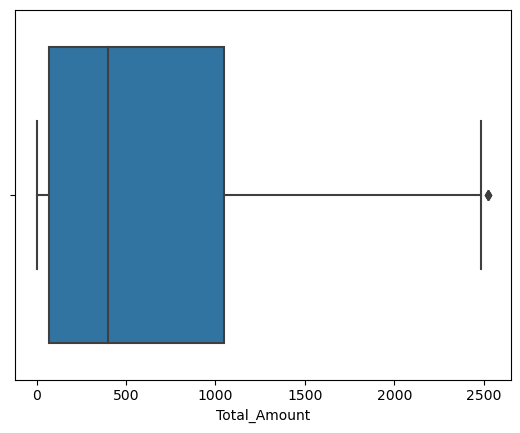

In [60]:
sns.boxplot(data=df, x="Total_Amount")

* Making the visualizations

In [152]:
dfT = df.groupby('Generation')['Total_Amount'].median().reset_index()

In [153]:
gen = alt.Chart(dfT).mark_bar().encode(
    x=alt.X('Generation:N', sort='-y', axis=alt.Axis(labelAngle=0)), 
    y='Total_Amount:Q',
    color=alt.Color('Generation:N', title=None, scale=color_scale, legend=None),
).properties(
    title=alt.Title(
        'Median Total Amount by Generation',
        subtitle='2012-2014',
        anchor='middle',
        align='center',
        font='Calibri',
        fontSize=18,
        offset=20
    ),
    width=400, height=300
)
text = gen.mark_text(align='center', baseline='middle', dy=-5).encode(text=alt.Text('Total_Amount'))

show_gen=gen +text

In [63]:
dfT2 = df.groupby('Education')['Total_Amount'].median().reset_index()

In [64]:
edu = alt.Chart(dfT2).mark_bar().encode(
    x=alt.X('Education:N', sort='-y', axis=alt.Axis(labelAngle=0)), 
    y='Total_Amount:Q',
    color=alt.Color('Education:N', title=None, scale=color_scale2, legend=None),
).properties(
    title=alt.Title(
        'Median Total Amount by Education',
        subtitle='2012-2014',
        anchor='middle',
        align='center',
        font='Calibri',
        fontSize=18,
        offset=20
    ),
    width=400, height=300
)
text = edu.mark_text(align='center', baseline='middle', dy=-5).encode(text=alt.Text('Total_Amount'))

show_edu=edu +text

In [65]:
dfT3 = df.groupby('IncomeCategory')['Total_Amount'].median().reset_index()

In [66]:
inc = alt.Chart(dfT3).mark_bar().encode(
    x=alt.X('IncomeCategory:N', sort='-y', axis=alt.Axis(labelAngle=0)), 
    y='Total_Amount:Q',
    color=alt.Color('IncomeCategory:N', title=None, scale=color_scale3, legend=None),
).properties(
    title=alt.Title(
        'Median Total Amount by Income Category',
        subtitle='2012-2014',
        anchor='middle',
        align='center',
        font='Calibri',
        fontSize=18,
        offset=20
    ),
    width=400, height=300
)
text = inc.mark_text(align='center', baseline='middle', dy=-5).encode(text=alt.Text('Total_Amount'))

show_inc=inc +text

In [67]:
dfT4 = df.groupby('FamilyQty')['Total_Amount'].median().reset_index()

In [68]:
fam = alt.Chart(dfT4).mark_bar().encode(
    x=alt.X('FamilyQty:N', sort='-y', axis=alt.Axis(labelAngle=0)), 
    y='Total_Amount:Q',
    color=alt.Color('FamilyQty:N', title=None, scale=color_scale4, legend=None),
).properties(
    title=alt.Title(
        'Median Total Amount by Family Quantity',
        subtitle='2012-2014',
        anchor='middle',
        align='center',
        font='Calibri',
        fontSize=18,
        offset=20
    ),
    width=400, height=300
)
text = fam.mark_text(align='center', baseline='middle', dy=-5).encode(text=alt.Text('Total_Amount'))

show_fam=fam +text

In [155]:
# check T_FrequencyPurchase normality

stats, pval=normaltest(df['Freq_Purchase'])
if pval<=0.05:
    print('not normal') #Ha
else: 
    print('normal ditribution') #Ho 

not normal


<Axes: xlabel='Freq_Purchase'>

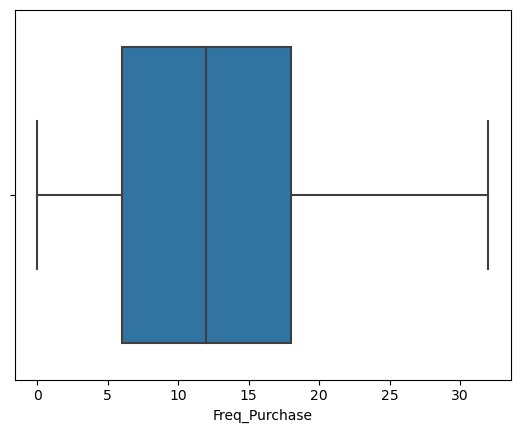

In [156]:
sns.boxplot(data=df, x="Freq_Purchase")

In [71]:
df['Freq_Purchase'].describe()

count    2028.000000
mean       12.570020
std         7.186879
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        32.000000
Name: Freq_Purchase, dtype: float64

* Making the visualization

In [72]:
dfF = df.groupby('Generation')['Freq_Purchase'].median().reset_index()

In [73]:
gen2 = alt.Chart(dfF).mark_bar().encode(
    x=alt.X('Generation:N', sort='-y', axis=alt.Axis(labelAngle=0)), 
    y='Freq_Purchase:Q',
    color=alt.Color('Generation:N', title=None, scale=color_scale, legend=None),
).properties(
    title=alt.Title(
        'Median Frequency Purchase by Generation',
        subtitle='2012-2014',
        anchor='middle',
        align='center',
        font='Calibri',
        fontSize=18,
        offset=20
    ),
    width=400, height=300
)
text = gen2.mark_text(align='center', baseline='middle', dy=-5).encode(text=alt.Text('Freq_Purchase'))

showgen=gen2 +text

In [74]:
dfF2 = df.groupby('Education')['Freq_Purchase'].median().reset_index()

In [75]:
edu2 = alt.Chart(dfF2).mark_bar().encode(
    x=alt.X('Education:N', sort='-y', axis=alt.Axis(labelAngle=0)), 
    y='Freq_Purchase:Q',
    color=alt.Color('Education:N', title=None, scale=color_scale2, legend=None),
).properties(
    title=alt.Title(
        'Median Frequency Purchase by Education',
        subtitle='2012-2014',
        anchor='middle',
        align='center',
        font='Calibri',
        fontSize=18,
        offset=20
    ),
    width=400, height=300
)
text = edu2.mark_text(align='center', baseline='middle', dy=-5).encode(text=alt.Text('Freq_Purchase'))

showedu=edu2 +text

In [76]:
dfF3 = df.groupby('IncomeCategory')['Freq_Purchase'].median().reset_index()

In [77]:
inc2 = alt.Chart(dfF3).mark_bar().encode(
    x=alt.X('IncomeCategory:N', sort='-y', axis=alt.Axis(labelAngle=0)), 
    y='Freq_Purchase:Q',
    color=alt.Color('IncomeCategory:N', title=None, scale=color_scale3, legend=None),
).properties(
    title=alt.Title(
        'Median Frequency Purchase by IncomeCategory',
        subtitle='2012-2014',
        anchor='middle',
        align='center',
        font='Calibri',
        fontSize=18,
        offset=20
    ),
    width=400, height=300
)
text = inc2.mark_text(align='center', baseline='middle', dy=-5).encode(text=alt.Text('Freq_Purchase'))

showinc=inc2 +text

In [78]:
dfF4 = df.groupby('FamilyQty')['Freq_Purchase'].median().reset_index()

In [79]:
fam2 = alt.Chart(dfF4).mark_bar().encode(
    x=alt.X('FamilyQty:N', sort='-y', axis=alt.Axis(labelAngle=0)), 
    y='Freq_Purchase:Q',
    color=alt.Color('FamilyQty:N', title=None, scale=color_scale4, legend=None),
).properties(
    title=alt.Title(
        'Median Frequency Purchase by Family Quantity',
        subtitle='2012-2014',
        anchor='middle',
        align='center',
        font='Calibri',
        fontSize=18,
        offset=20
    ),
    width=400, height=300
)
text = fam2.mark_text(align='center', baseline='middle', dy=-5).encode(text=alt.Text('Freq_Purchase'))

showfam= fam2+text

In [82]:
((show_gen | show_edu) & ((show_inc | show_fam).resolve_scale(color='independent'))).properties(title=alt.Title(
        'Median Total Amount by Different Customer Group',
        anchor='middle',
        align='center',
        font='Arial',
        fontSize=25,
        offset=20
    ))

alt.VConcatChart(...)

In [83]:
((showgen | showedu) & (showinc | showfam).resolve_scale(color='independent')).properties(title=alt.Title(
        'Median Frequency Purchase by Different Customer Group',
        anchor='middle',
        align='center',
        font='Arial',
        fontSize=25,
        offset=20
    ))

alt.VConcatChart(...)

From the charts above, we can see that :

- **Generation:**
    - On Generation categories, the highest spending amounts and purchasing frequency are observed in the 'Silent Gen' category with a median spending amount of 1081.5, with a MAD of ±16562, followed by 'Baby Boomer' , 'Gen X' and 'Millennials'. 
    - Frequency between 'Silent Gen' and 'Millennials' is very different. This suggests that older individuals tend to spend more, possibly due to higher disposable incomes or different consumption preferences.

- **Education:**
    - In terms of education levels, the lowest spending and purchasing frequency is in the "Basic" category spends the least with a median amount of 57.5 ±16562 MAD, while the 'PhD', 'Master' and 'Graduation' levels spend considerably more, around 300-500 ±16562 MAD. 
    - Customers with 'Graduation', 'Master', 'PhD' educational backgrounds could be a focus for business strategies and marketing efforts due to their frequent and relatively high spending amounts. 

- **Family Quantity:**
    - Customers with a family quantity of one have the highest spending amounts with a median spending amount of $1190, with a MAD of ±16562. While those with family member of four and five have the least spending.
    - There is an observed trend where the spending amount decreases as family size increases. 
    - From this graph, it can be interpreted that single individuals incur higher expenses, or the commodities purchased by singles are relatively pricier. The same pattern also found in the purchasing frequency. 

- **Income Category:**
    - The highest spending amounts and purchasing frequency are found in the 'Very High' with a median spending amount of 1717, with a MAD of ±16562. The "High" category follows with a median of $1160, with a MAD of ±16113. 
    - Despite making up only 3% of the sample, the "Very High" category dominates in terms of both purchase frequency and transaction volume. This could be attributed to the purchase of more expensive items or bulk buying.

#### **3. How do product preferences differ across various customer demographics?**

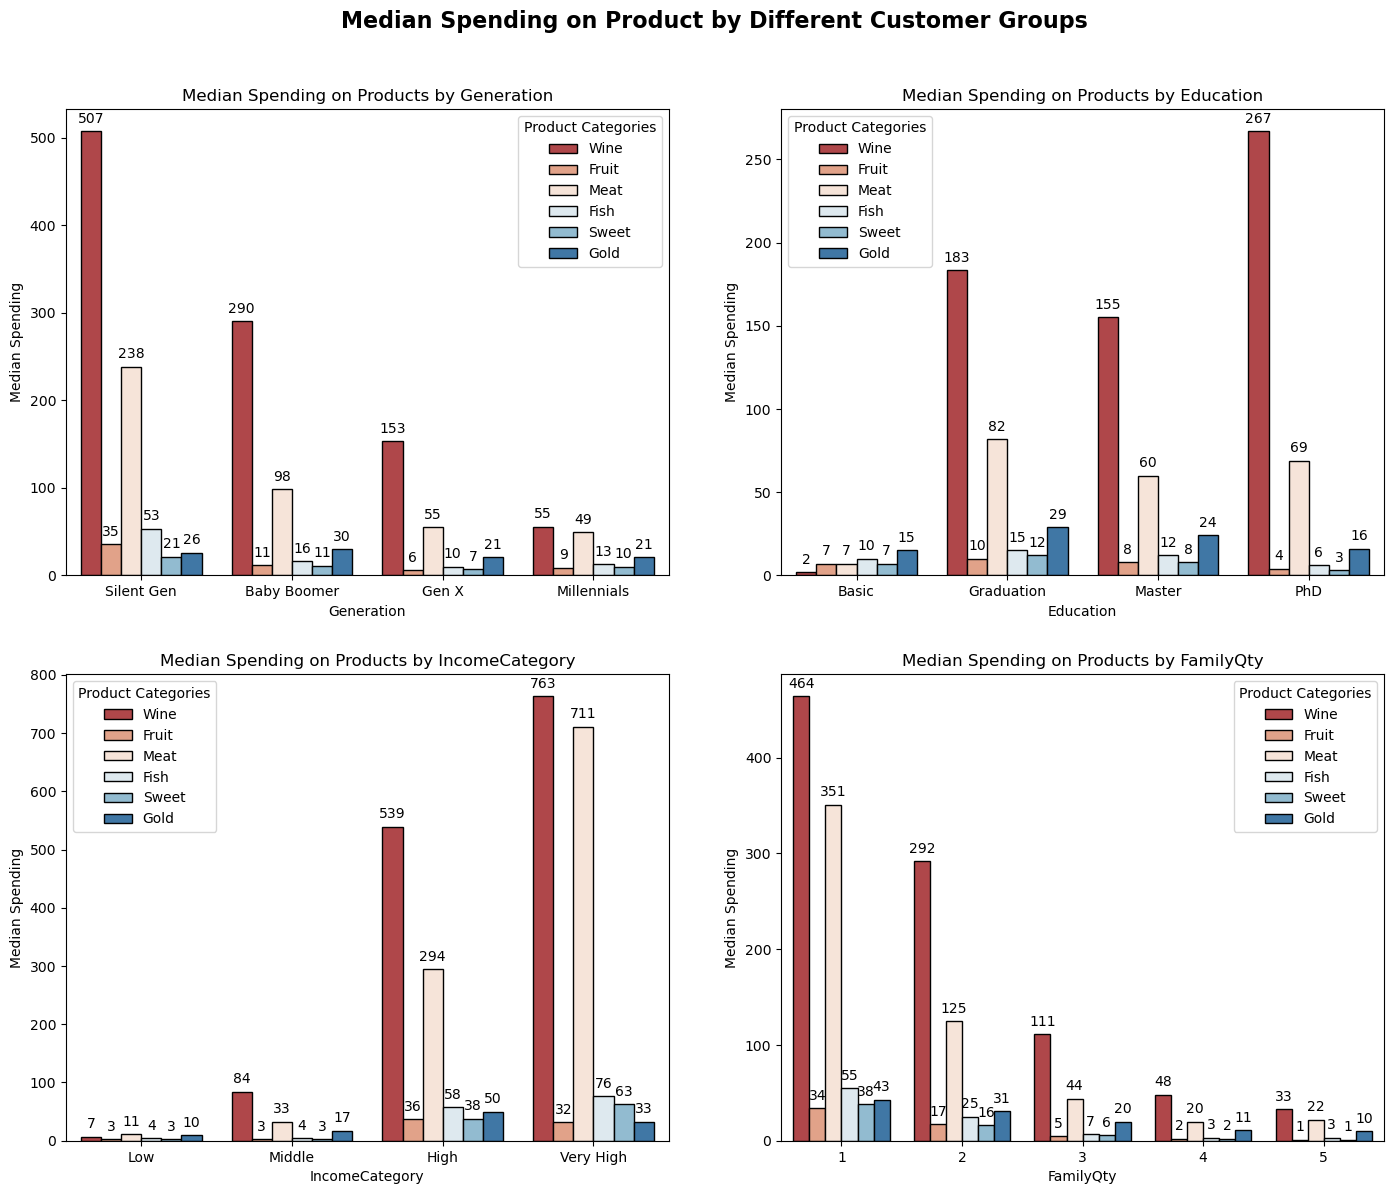

In [84]:
products = ['Wine', 'Fruit', 'Meat', 'Fish', 'Sweet', 'Gold']
cust_group = ['Generation', 'Education',  'IncomeCategory', 'FamilyQty']

fig, axs = plt.subplots(2, 2, figsize=(15, 12))
plt.tight_layout(pad=5.0)

fig.suptitle('Median Spending on Product by Different Customer Groups', fontsize=16, y=1.02, fontweight='bold')

for i, group in enumerate(cust_group):
    
    row = i // 2
    col = i % 2
    
    grouped_data = df.groupby(group)[products].median().reset_index().melt(id_vars=[group])
   
    ax = sns.barplot(data=grouped_data, x=group, y='value', hue='variable', palette='RdBu', ax=axs[row, col], edgecolor='black')
    
    axs[row, col].set_title(f'Median Spending on Products by {group}')
    axs[row, col].set_xlabel(group)
    axs[row, col].set_ylabel('Median Spending')
    axs[row, col].legend(title='Product Categories')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')
    
plt.show()

From the charts above, we can see that:

**Generation:**
- Wine emerges as the most dominant product across all generation categories.
- In the 'Silent Gen' category, the consumption of wine and meat is the highest, with a median spending of 507 and a MAD of ±166.5. Conversely, the 'Millennials' category has the lowest median spending at $55, with a MAD of ±166.5.
- Although there are significant variances in spending on wine and meat across different generation categories, the expenditure on gold products doesn’t show as much fluctuation.

**Education:**
- There isn’t a significant difference in purchase volumes between 'Graduation', 'Master', 'PhD' across various products.
- For consumers with a basic education level, gold appears to be the most frequently purchased product.

**Income Category:**
- The 'Very High' customers make the most purchases, followed by the 'High' category.
- Wine and meat are the primary products purchased by the 'Middle', 'High, and 'Very High' categories.
- For the 'Low' category, spending on meat and gold is higher compared to wine, suggesting that these products might not be highly sensitive to price variations.

**Family Quantity:**
- Wine is the predominant purchase across all family quantity, with the highest median spending being $464 and a MAD of ±166.5.
- In larger family members of 2, 3, 4, and 5, wine, meat, and gold products appear to be the primary purchases.

#### **4. How do purchase references differ across various customer demographics?**

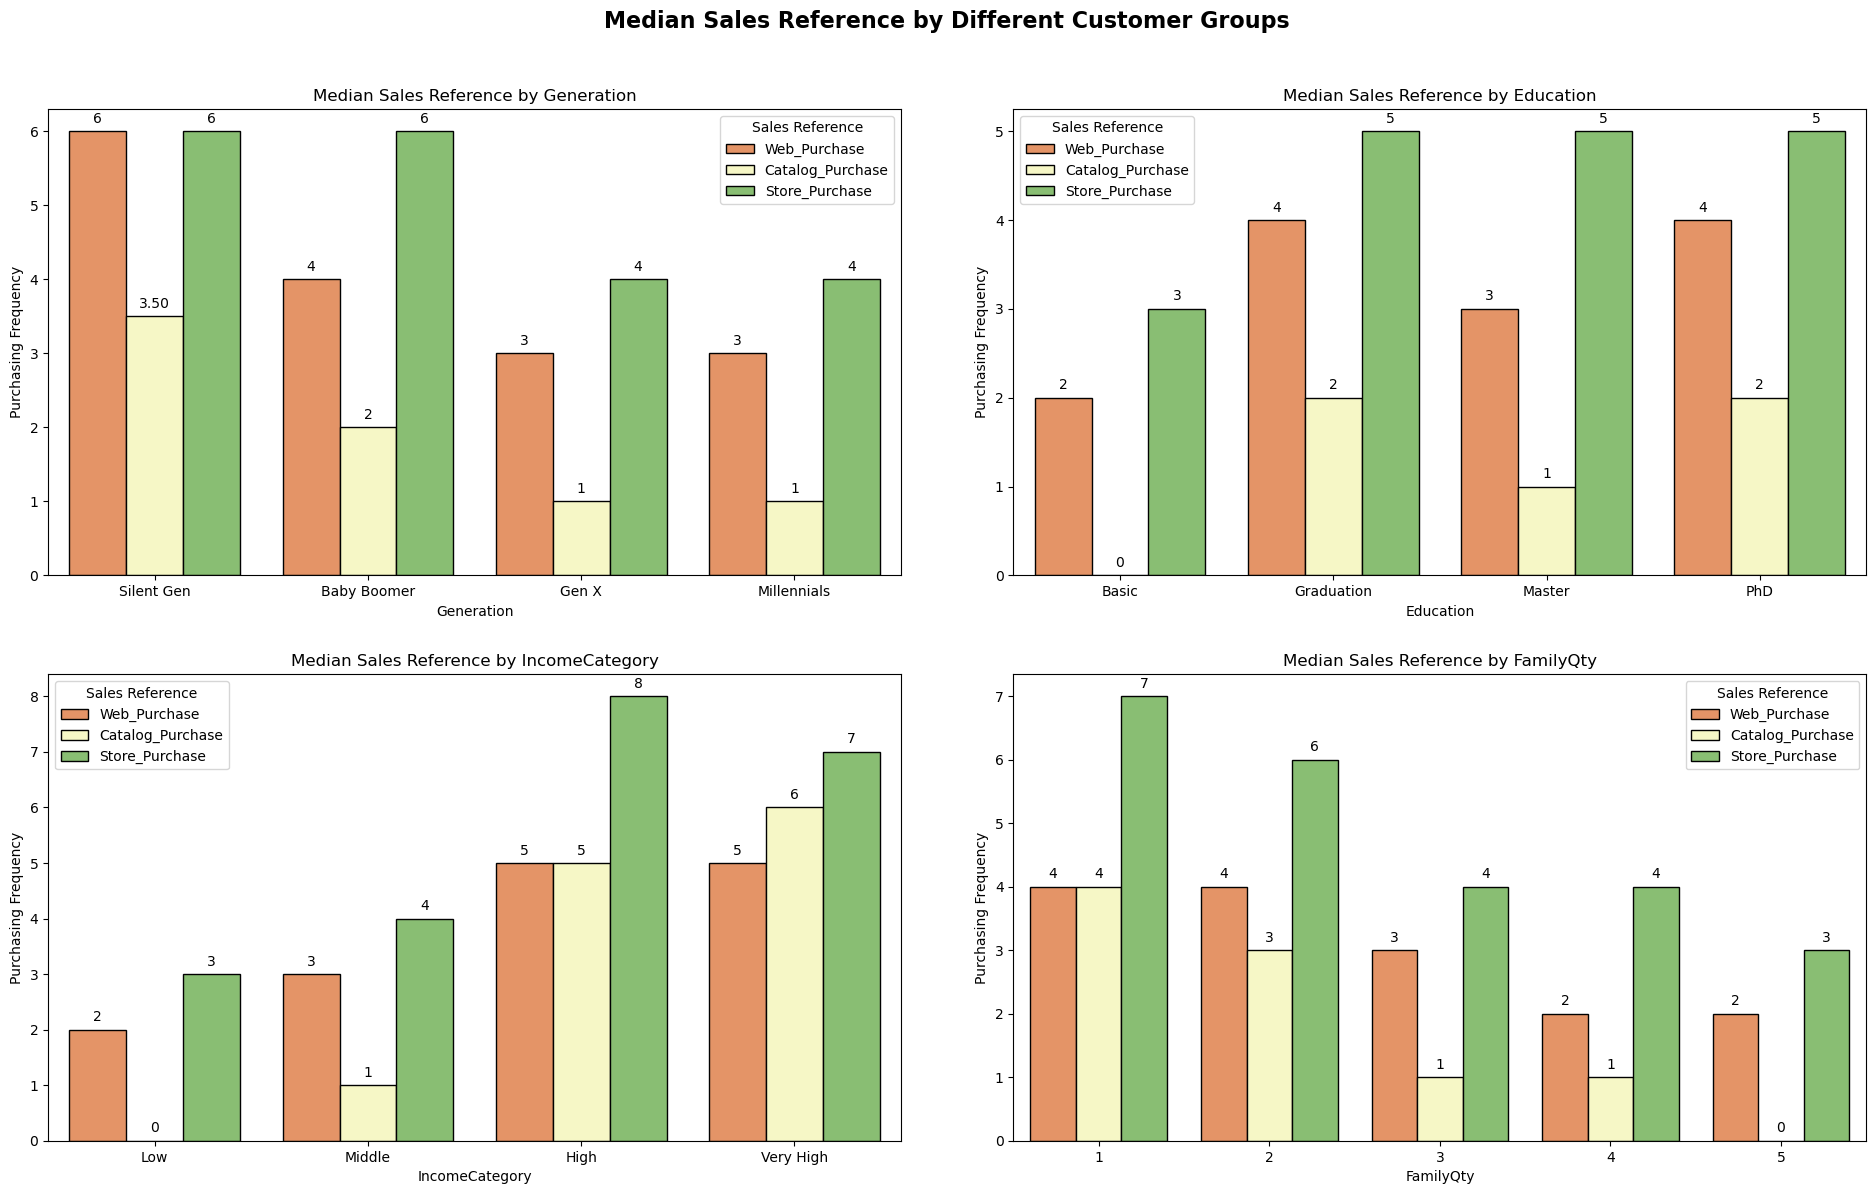

In [85]:
ref = ['Web_Purchase', 'Catalog_Purchase', 'Store_Purchase']
cust_group = ['Generation', 'Education',  'IncomeCategory', 'FamilyQty']


fig, axs = plt.subplots(2, 2, figsize=(20, 12))
plt.tight_layout(pad=5.0)

fig.suptitle('Median Sales Reference by Different Customer Groups', fontsize=16, y=1.02, fontweight='bold')

for i, group in enumerate(cust_group):
  
    row = i // 2
    col = i % 2

    grouped_data = df.groupby(group)[ref].median().reset_index().melt(id_vars=[group])

    ax = sns.barplot(data=grouped_data, x=group, y='value', hue='variable', palette='RdYlGn', ax=axs[row, col], edgecolor='black')

    axs[row, col].set_title(f'Median Sales Reference by {group}')
    axs[row, col].set_xlabel(group)
    axs[row, col].set_ylabel('Purchasing Frequency')
    axs[row, col].legend(title='Sales Reference')

    for p in ax.patches:
        height = p.get_height()
        if height.is_integer():
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center',
                        xytext=(0, 9),
                        textcoords='offset points')
        else:
            ax.annotate(f'{height:.2f}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center',
                        xytext=(0, 9),
                        textcoords='offset points')

plt.show()

From the charts above, we can see that :

**Generation:**
- The most frequently used purchasing reference across all age categories is in-store purchases, followed by purchases made through the website.
- All references purchases in 'Silent Gen' largest across each generations.

**Education:**
- In-store purchasing is the highest reference in each category, followed by purchases from the website.
- In the basic category, catalogue purchases are less favored.

**Income Category:**
- In-store purchasing is the dominant reference in all category.
- Catalogue purchases are most popular among the 'Very High' category.

**Family Quantity:**
- The dominant purchasing reference in each category is in-store purchasing, followed by web purchasing.
- The interest in catalogue purchases is highest among single customers and decreases as family size increases. Catalogue purchases could be a strategy to target customers with smaller family quantity.

#### **5. How do respons to deals differ across various customer demographics?**


In [86]:
stats, pval=normaltest(df['Deals_Purchase'])
if pval<=0.05:
    print('not normal') #Ha
else: 
    print('normal ditribution') #Ho 

not normal


<Axes: xlabel='Deals_Purchase'>

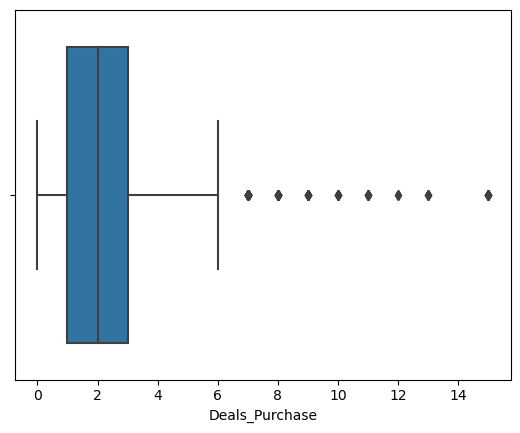

In [87]:
sns.boxplot(data=df, x="Deals_Purchase")

In [88]:
df['Deals_Purchase'].describe()

count    2028.000000
mean        2.339250
std         1.935389
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: Deals_Purchase, dtype: float64

In [89]:
dfD = df.groupby('Generation')['Deals_Purchase'].median().reset_index()
dfD_clean = dfD.dropna(subset=['Generation', 'Deals_Purchase'])

In [90]:
deals = alt.Chart(dfD_clean).mark_bar().encode(
    x=alt.X('Generation:N', sort='-y', axis=alt.Axis(labelAngle=0)),
    y='Deals_Purchase:Q',
    color=alt.Color('Generation:N', title=None, scale=color_scale, legend=None),
).properties(
    title=alt.Title(
        'Median Deals Purchase by Generation',
        subtitle='2012-2014',
        anchor='middle',
        align='center',
        font='Calibri',
        fontSize=18,
        offset=20
    ),
    width=400, height=300
)
text = deals.mark_text(align='center', baseline='middle', dy=-5).encode(text=alt.Text('Deals_Purchase'))

showd= deals+text

In [91]:
dfD2 = df.groupby('Education')['Deals_Purchase'].median().reset_index()
dfD2_clean = dfD2.dropna(subset=['Education', 'Deals_Purchase'])

In [92]:
deals2 = alt.Chart(dfD2_clean).mark_bar().encode(
    x=alt.X('Education:N', sort='-y', axis=alt.Axis(labelAngle=0)),
    y='Deals_Purchase:Q',
    color=alt.Color('Education:N', title=None, scale=color_scale2, legend=None),
).properties(
    title=alt.Title(
        'Median Deals Purchase by Education',
        subtitle='2012-2014',
        anchor='middle',
        align='center',
        font='Calibri',
        fontSize=18,
        offset=20
    ),
    width=400, height=300
)
text = deals2.mark_text(align='center', baseline='middle', dy=-5).encode(text=alt.Text('Deals_Purchase'))

showd2= deals2+text

In [93]:
dfD3 = df.groupby('IncomeCategory')['Deals_Purchase'].median().reset_index()
dfD3_clean = dfD3.dropna(subset=['IncomeCategory', 'Deals_Purchase'])

In [94]:
deals3 = alt.Chart(dfD3_clean).mark_bar().encode(
    x=alt.X('IncomeCategory:N', sort='-y', axis=alt.Axis(labelAngle=0)),
    y='Deals_Purchase:Q',
    color=alt.Color('IncomeCategory:N', title=None, scale=color_scale3, legend=None),
).properties(
    title=alt.Title(
        'Median Deals Purchase by Income Category',
        subtitle='2012-2014',
        anchor='middle',
        align='center',
        font='Calibri',
        fontSize=18,
        offset=20
    ),
    width=400, height=300
)
text = deals3.mark_text(align='center', baseline='middle', dy=-5).encode(text=alt.Text('Deals_Purchase'))

showd3= deals3+text


In [95]:
dfD4 = df.groupby('FamilyQty')['Deals_Purchase'].median().reset_index()
dfD4_clean = dfD4.dropna(subset=['FamilyQty', 'Deals_Purchase'])

In [96]:
deals4 = alt.Chart(dfD4_clean).mark_bar().encode(
    x=alt.X('FamilyQty:N', sort='-y', axis=alt.Axis(labelAngle=0)),
    y='Deals_Purchase:Q',
    color=alt.Color('FamilyQty:N', title=None, scale=color_scale4, legend=None),
).properties(
    title=alt.Title(
        'Median Deals Purchase by Family Quantity',
        subtitle='2012-2014',
        anchor='middle',
        align='center',
        font='Calibri',
        fontSize=18,
        offset=20
    ),
    width=400, height=300
)
text = deals4.mark_text(align='center', baseline='middle', dy=-5).encode(text=alt.Text('Deals_Purchase'))

showd4= deals4+text

In [97]:
((showd | showd2) & (showd3 | showd4).resolve_scale(color='independent')).properties(title=alt.Title(
        'Median Deals Purchase by Different Customer Group',
        anchor='middle',
        align='center',
        font='Arial',
        fontSize=25,
        offset=20
    ))

alt.VConcatChart(...)

From the charts above, we can see that :

**Generation:**
- 'Baby Boomer' and 'Gen X' individuals seem to purchase deals at a higher median rate compared to 'Silent Gen' and 'Millennials.

**Education:**
- Customers with graduate and postgraduate education level tend to purchase more deals, while those with basic level tend to purchase fewer deals.

**Income Category:**
- 'Low' and 'Middle' tend to purchase more deals compared to 'High' and 'Very High' classes.

**Family Quantity:**
- The median number of deals purchased seems to slightly increase as the family size increase, with some variation.

#### **6. How do campaign acceptance differ various customer demographics?**

* Check normalities of Total Acc Campaign

In [98]:
from scipy.stats import shapiro

stat, p = shapiro(df['Total_AccCmp'])

print(f'Statistic: {stat}, P-value: {p}')

alpha = 0.05
if p > alpha:
    print('normal')
else:
    print('not normal')

Statistic: 0.5721828937530518, P-value: 0.0
not normal


<Axes: xlabel='Total_AccCmp'>

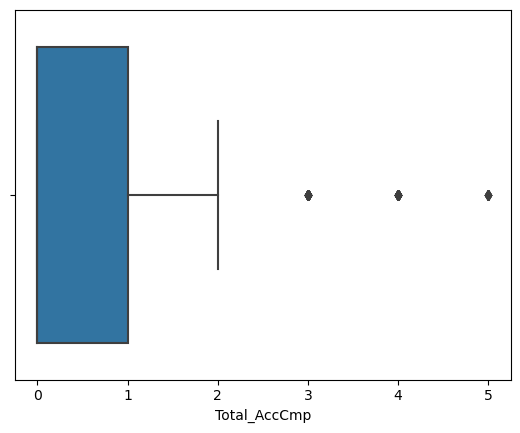

In [99]:
sns.boxplot(data=df, x="Total_AccCmp")

In [100]:
df['Total_AccCmp'].describe()

count    2028.000000
mean        0.454142
std         0.894189
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: Total_AccCmp, dtype: float64

* Making the Visualization using Sum

In [101]:
dfC = df.groupby('Generation')['Total_AccCmp'].sum().reset_index()

* Check Normality with shapiro 

In [102]:
stat, p = shapiro(dfC['Total_AccCmp'])

print(f'Statistic: {stat}, P-value: {p}')

alpha = 0.05
if p > alpha:
    print('Data berdistribusi normal (tidak menolak H0)')
else:
    print('Data tidak berdistribusi normal (menolak H0)')

Statistic: 0.9475894570350647, P-value: 0.7010924220085144
Data berdistribusi normal (tidak menolak H0)


In [103]:
cmp = alt.Chart(dfC).mark_bar().encode(
    x=alt.X('Generation:N', sort='-y', axis=alt.Axis(labelAngle=0)),
    y='Total_AccCmp:Q',
    color=alt.Color('Generation:N', title=None, scale=color_scale, legend=None),
).properties(
    title=alt.Title(
        ' Total Acc Campaign by Generation ',
        subtitle='2012-2014',
        anchor='middle',
        align='center',
        font='Calibri',
        fontSize=18,
        offset=20
    ),
    width=400, height=300
)
text = cmp.mark_text(align='center', baseline='middle', dy=-5).encode(text=alt.Text('Total_AccCmp'))

plot= cmp+text

In [104]:
df[['Generation','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5','Latest_Cmp'] ].groupby('Generation').sum().reset_index()

,Generation,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Latest_Cmp
0,Silent Gen,2,0,2,2,3,4
1,Baby Boomer,49,10,34,64,47,96
2,Gen X,48,11,71,69,51,135
3,Millennials,34,5,43,20,45,76


In [105]:
dfC2 = df.groupby('Education')['Total_AccCmp'].sum().reset_index()

In [106]:
cmp2 = alt.Chart(dfC2).mark_bar().encode(
    x=alt.X('Education:N', sort='-y', axis=alt.Axis(labelAngle=0)),
    y='Total_AccCmp:Q',
    color=alt.Color('Education:N', title=None, scale=color_scale2, legend=None),
).properties(
    title=alt.Title(
        'Total Acc Campaign by Education',
        subtitle='2012-2014',
        anchor='middle',
        align='center',
        font='Calibri',
        fontSize=18,
        offset=20
    ),
    width=400, height=300
)
text = cmp2.mark_text(align='center', baseline='middle', dy=-5).encode(text=alt.Text('Total_AccCmp'))

plot2= cmp2+text

In [107]:
df[['Education','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5']].groupby('Education').sum().reset_index()

,Education,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,Basic,0,0,4,0,0
1,Graduation,75,14,73,74,76
2,Master,30,4,37,38,35
3,PhD,28,8,36,43,35


In [108]:
dfC3 = df.groupby('IncomeCategory')['Total_AccCmp'].sum().reset_index()

In [109]:
cmp3 = alt.Chart(dfC3).mark_bar().encode(
    x=alt.X('IncomeCategory:N', sort='-y', axis=alt.Axis(labelAngle=0)),
    y='Total_AccCmp',
    color=alt.Color('IncomeCategory:N', title=None, scale=color_scale3, legend=None),
).properties(
    title=alt.Title(
        'Total Acc Campaign by Income Category',
        subtitle='2012-2014',
        anchor='middle',
        align='center',
        font='Calibri',
        fontSize=18,
        offset=20
    ),
    width=400, height=300
)
text = cmp3.mark_text(align='center', baseline='middle', dy=-5).encode(text=alt.Text('Total_AccCmp'))

plot3= cmp3+text

In [110]:
dfC4 = df.groupby('FamilyQty')['Total_AccCmp'].sum().reset_index()

In [111]:
cmp4 = alt.Chart(dfC4).mark_bar().encode(
    x=alt.X('FamilyQty:N', sort='-y', axis=alt.Axis(labelAngle=0)),
    y='Total_AccCmp',
    color=alt.Color('FamilyQty:N', title=None, scale=color_scale4, legend=None),
).properties(
    title=alt.Title(
        'Total Acc Campaign by Family Quantity',
        subtitle='2012-2014',
        anchor='middle',
        align='center',
        font='Calibri',
        fontSize=18,
        offset=20
    ),
    width=400, height=300
)
text = cmp4.mark_text(align='center', baseline='middle', dy=-5).encode(text=alt.Text('Total_AccCmp'))

plot4= cmp4+text

In [112]:
((plot | plot2) & (plot3 | plot4).resolve_scale(color='independent')).properties(title=alt.Title(
        'Total Acc Campaign by Different Customer Group',
        anchor='middle',
        align='center',
        font='Arial',
        fontSize=25,
        offset=20
    ))

alt.VConcatChart(...)

* The Detail Visualization

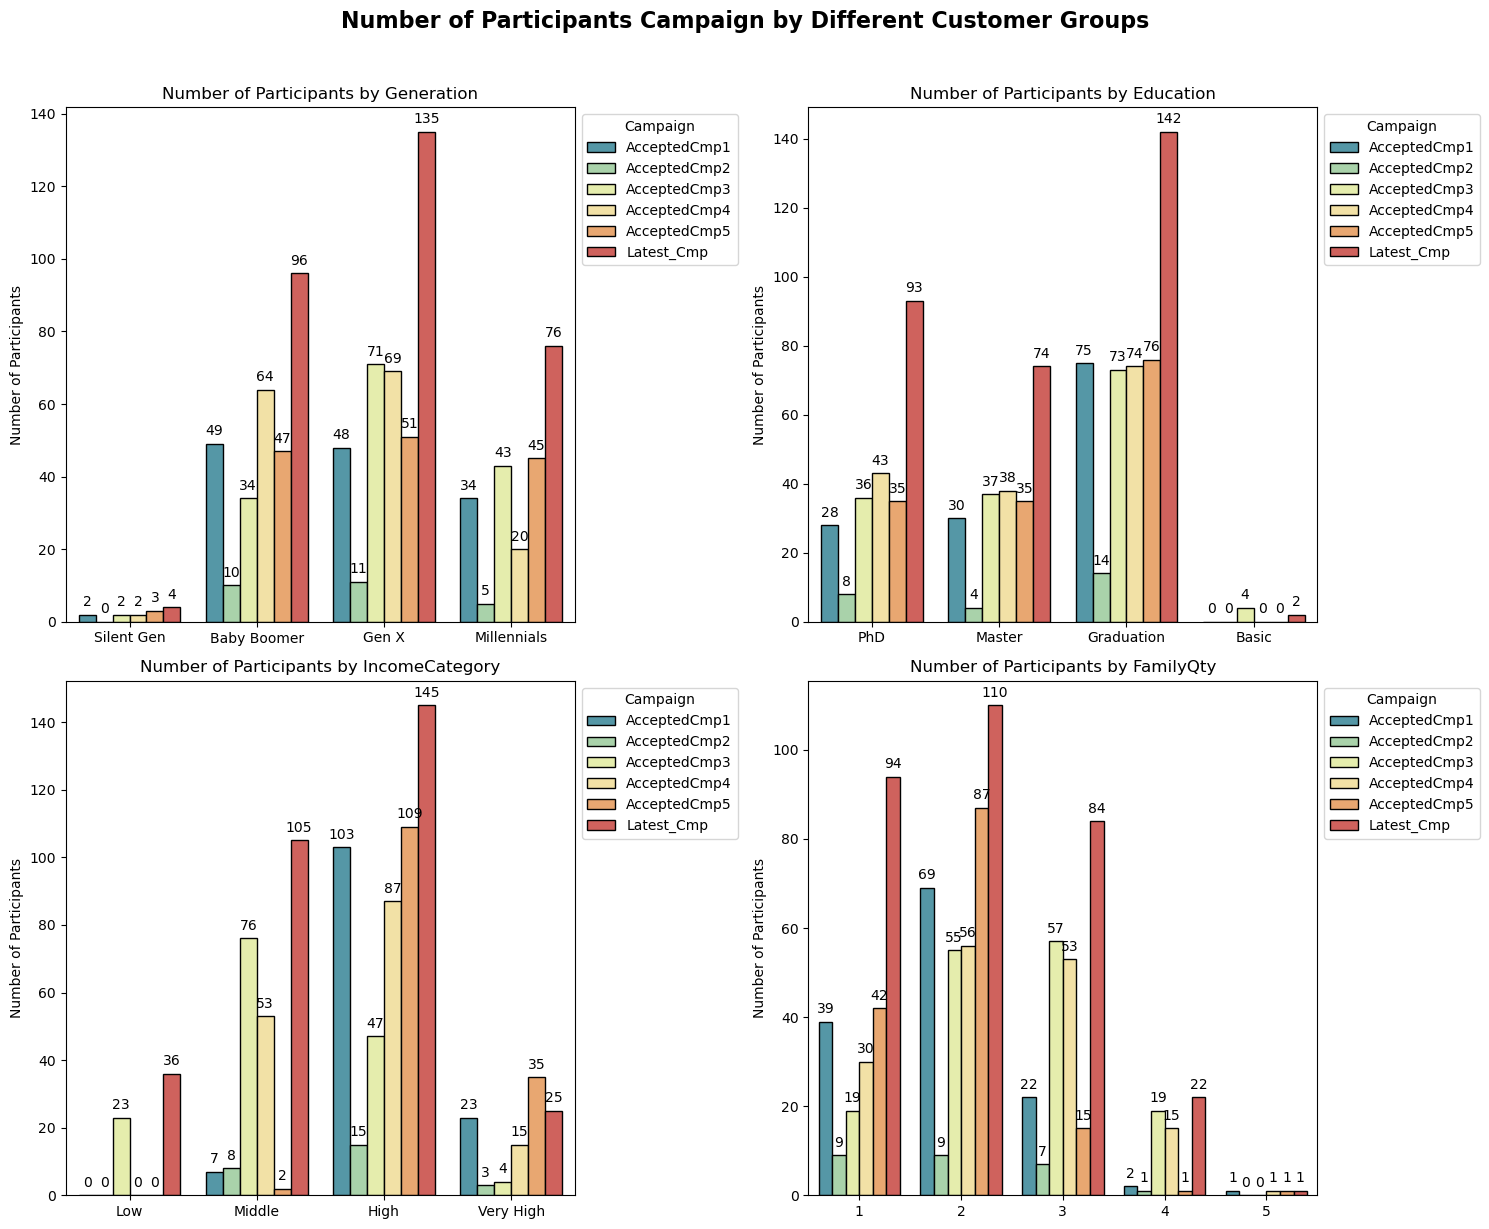

In [113]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
columns_to_analyze = ['Generation', 'Education', 'IncomeCategory', 'FamilyQty']
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Latest_Cmp']

fig.suptitle('Number of Participants Campaign by Different Customer Groups', fontsize=16, y=1.02, fontweight='bold')

for ax, col in zip(axs.flatten(), columns_to_analyze):
    # Melting the DataFrame to have one column for the responses
    melted_df = df.melt(id_vars=col, value_vars=campaign_columns, var_name='Campaign', value_name='Response')
    
    # Keeping only accepted responses
    melted_df = melted_df[melted_df['Response'] == 1]
    
    # Creating a countplot
    ax = sns.countplot(data=melted_df, x=col, hue='Campaign', palette='Spectral_r', ax=ax, edgecolor='black')
    
    ax.set_title(f'Number of Participants by {col}')
    ax.set_xlabel('')
    ax.set_ylabel('Number of Participants')
    ax.legend(title='Campaign', bbox_to_anchor=(1, 1), loc='upper left')
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()


From the charts above, we can see that :

**Generation:**
- Overall 'Gen X' dominates the acceptance campaign with 385 acceptances. 
- 'Latest_Cmp' is dominantly accepted by all categories. There’s a noticeable drop in acceptance among the 'Silent Gen'.
- The 'Silent Gen' group showed little interest in all campaigns.

**Education:**
- In general, 'Graduation' level dominates the acceptance campaign with 454 acceptances.
- Participants with an 'Graduation' level show the highest acceptance for 'AcceptedCmp5' and 'Latest_Cmp', followed by those with a 'Master' and 'PhD' degrees. Basic education categories have minimal to no participation.
- A similar trend is observed in other campaigns, where individuals with 'Graduation', 'Master' and 'PhD' educations are the most active.

**Income Category:**
- Category 'High' dominates the acceptance campaign with 506 acceptances.
- The 'High' income category dominantly participates in 'AcceptedCmp5' and 'Latest_Cmp'. There’s a significant drop in participation from the 'Low' and 'Very High' income categories. 
- Similar trends are observed in other campaigns, where the 'Middle' and 'High' categories seems to be the primary target audience showing interest.

**Family Quantity:**
- Family with 2 members dominates the acceptance campaign with 386 acceptances.
- 'AcceptedCmp5' and 'Latest_Cmp' is mainly accepted by participants with a family quantity of 2. 
- There's a decline in acceptance as the family size increases.
- This trend of higher acceptance rates among smaller families (1-3) is somewhat consistent across other campaigns as well.

### **`Q2. What potential areas can be developed or improved for future campaigns and sales?`**

#### **Customer Potential to Buy**

In [114]:
chart = alt.Chart(df).mark_circle().encode(
    x=alt.X('Income:Q', title='Income'),
    y=alt.Y('Freq_Purchase:Q', title='Freq Purchase'),
    color=alt.Color('IncomeCategory:N', legend=alt.Legend(title='Category')),
    tooltip=['Income', 'Freq_Purchase', 'IncomeCategory']
).properties(
    title='Scatter Plot of Income vs Frequency Purchases by Income Category'
)

In [115]:
chart2 = alt.Chart(df).mark_circle().encode(
    x=alt.X('Age:Q', title='Age'),
    y=alt.Y('Freq_Purchase:Q', title='Freq Purchase'),
    color=alt.Color('Generation:N', legend=alt.Legend(title='Category')),
    tooltip=['Age', 'Freq_Purchase', 'Generation']
).properties(
    title='Scatter Plot of Age vs Frequency Purchases by Generation'
)

In [116]:
(chart|chart2).resolve_scale(color='independent')

alt.HConcatChart(...)

1. **Income vs Frequency Purchases**

- 'Low' category generally show a lower total number of purchases.
- 'Middle', 'High', Very High categories seems to be a wider distribution in the frequency purchases, with some individuals making a higher number of purchases.
- No Clear Correlation: There isn’t a clear, strong correlation between income and frequency purchases, as there is a wide spread of data points across various income categories.

2. **Age vs Frequency Purchases**

- 'Millennials', 'Gen X', 'Baby Boomer' seem to have a varied total number of purchases, with no clear trend indicating whether age influences purchasing behavior significantly.The individuals have a wider spread in the total number of purchases, indicating more variability in purchasing behavior in this generations. 
- 'Silent Gen' don't show a clear trend but is somewhat scattered as well.
- No Strong Trend: Similar to the income plot, there isn’t a strong observable trend between age and frequency of purchases.


In [117]:
chart3 = alt.Chart(df).mark_circle().encode(
    x=alt.X('Income:Q', title='Income'),
    y=alt.Y('Total_Amount:Q', title='Total Amount'),
    color=alt.Color('IncomeCategory:N', legend=alt.Legend(title='Category')),
    tooltip=['Income', 'Total_Amount', 'IncomeCategory']
).properties(
    title='Scatter Plot of Income vs Total Amount by Income Category'
)

In [118]:
chart4 = alt.Chart(df).mark_circle().encode(
    x=alt.X('Age:Q', title='Age'),
    y=alt.Y('Total_Amount:Q', title='Total Amount'),
    color=alt.Color('Generation:N', legend=alt.Legend(title='Category')),
    tooltip=['Age', 'Total_Amount', 'Generation']
).properties(
    title='Scatter Plot of Age vs Total Amount by Generation'
)

In [119]:
(chart3|chart4).resolve_scale(color='independent')

alt.HConcatChart(...)

1. **Income vs Total Amount**

- Individuals in the 'Low' and 'Middle' income categories tend to spend less overall, as expected due to their limited financial resources.
- People in the 'High' and 'Very High' income categories exhibit a broader range of total amounts, with some individuals spending quite significantly.
- Correlation: There seems to be a general trend where higher income is associated with higher total spending, but there are also many exceptions and a wide dispersion of data points.

2. **Age vs Total Amount**

- 'Millennials' have a wide range of spending behaviors, with some spending very little and others spending quite a bit.
- The 'Gen X' and 'Baby Boomer' group also shows a wide dispersion in spending, while the 'Silent Gen' seem to have a more clustered spending behavior with fewer high spenders.
- There isn’t a strong, consistent trend indicating that age is a decisive factor in total spending, as there is a fair amount of variability across all age groups.

#### **Products Favorite**

In [120]:
fav=df[['Wine', 'Fruit', 'Meat',
       'Fish', 'Sweet', 'Gold']].sum().reset_index()
fav.head()

,index,0
0,Wine,619948
1,Fruit,53297
2,Meat,340622
3,Fish,76028
4,Sweet,55111


In [121]:
fav.columns = ['Product', 'Total Amount']

chartz = alt.Chart(fav).mark_bar().encode(
    x=alt.X('Product:N', title='Product', sort='-y', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('Total Amount:Q', title='Total Amount'),
    color=alt.Color('Total Amount:Q', scale=alt.Scale(scheme='category10'), legend=None),
).properties(
    title=alt.Title(
        'Total Amount by Product Category in Supermarket',
        anchor='middle',
        align='center',
        font='Calibri',
        fontSize=18,
        offset=20
    ),
    width=400, height=300
)
text = chartz.mark_text(align='center', baseline='middle', dy=-5).encode(text=alt.Text('Total Amount:Q'))

chartz + text


alt.LayerChart(...)

1. **Wine Dominance**

    - Wines appear to be the most popular product category, with the highest total amount spent. This indicates that wines are a significant contributor to the company's revenue and are highly favored by customers.

2. **Meat Products**

    - Meat products come second in the total spending, showing that they are also a vital part of the product portfolio, resonating well with customer preferences.

3. **Gold, Fish, Sweets, and Fruit Products**

    - Fruit, sweet, fish and gold products have lower total spending, with gold and fish products being moderately popular.
    - Sweet products and fruit products have the lowest total spending, indicating less customer interest or lower sales volumes in these categories.

4. **Variability in Spending**

    - There’s a significant variability in spending across different product categories, with wines and meat products dominating the customer spending.

#### **Reference Purchase Favorite**

In [122]:
refs=df[['Web_Purchase', 'Catalog_Purchase', 'Store_Purchase']].sum().reset_index()
refs

,index,0
0,Web_Purchase,8324
1,Catalog_Purchase,5423
2,Store_Purchase,11745


In [123]:
refs.columns = ['Type', 'Total Purchase']

refs = alt.Chart(refs).mark_bar().encode(
    x=alt.X('Type:N', title='References', sort='-y', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('Total Purchase:Q', title='Total Purchase'),
    color=alt.Color('Total Purchase:Q', scale=alt.Scale(scheme='category10'), legend=None),
).properties(
    title=alt.Title(
        'Total Purchase by Purchase References in Supermarket',
        anchor='middle',
        align='center',
        font='Calibri',
        fontSize=18,
        offset=20
    ),
    width=400, height=300
)
text = refs.mark_text(align='center', baseline='middle', dy=-5).encode(text=alt.Text('Total Purchase:Q'))

refs + text

alt.LayerChart(...)

1. **Store Purchases Dominance**

    Store purchases dominate, accounting for the highest number of total purchases. This indicates that the physical store is currently the most effective channel for sales.

2. **Web and Catalog Channels**

    The Web and Catalog channels also hold significant portions of the total purchases, showcasing their relevance and effectiveness in the customer purchase journey.


#### **Total Campaign Acceptance**

In [124]:
camps=df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Latest_Cmp']].sum().reset_index()
camps

,index,0
0,AcceptedCmp1,133
1,AcceptedCmp2,26
2,AcceptedCmp3,150
3,AcceptedCmp4,155
4,AcceptedCmp5,146
5,Latest_Cmp,311


In [125]:
camps.columns = ['Campaign', 'Total Acc']

campg = alt.Chart(camps).mark_bar().encode(
    x=alt.X('Campaign:N', title='Campaign Model', sort='-y', axis=alt.Axis(labelAngle=40)),
    y=alt.Y('Total Acc:Q', title='Total Acc Campaign'),
    color=alt.Color('Total Acc:Q', scale=alt.Scale(scheme='category10'), legend=None),
).properties(
    title=alt.Title(
        'Total Acc Campaign by Model Campaign Acceptance',
        anchor='middle',
        align='center',
        font='Calibri',
        fontSize=18,
        offset=20
    ),
    width=400, height=300
)
text = campg.mark_text(align='center', baseline='middle', dy=-5).encode(text=alt.Text('Total Acc:Q'))

campg + text

alt.LayerChart(...)

Based on the total acc campaign column received by the Customer above, we can see that:
1. Most Effective Campaign: 'Latest_Cmp' was the campaign with the highest acceptance, followed by 'AcceptedCmp4', 'AcceptedCmp3', 'AcceptedCmp5' and 'AcceptedCmp1'.
2. Less Effective Campaign: 'AcceptedCmp2' was the campaign with the lowest acceptance, which may indicate that it is less aligned with customer interests.

### **`Q3. How does the Supermarket perform in building its marketing strategy?`**`

#### **Exploring the right time to do campaign**

One aspect that could be explored is identifying the most potential time to conduct a campaign. From the data, we can determine the days and months when the most members join. This insight could be instrumental in planning and optimizing the timing of future campaigns to maximize engagement and participation.

In [126]:
month = df.resample('M', on='Dt_Customer').size()

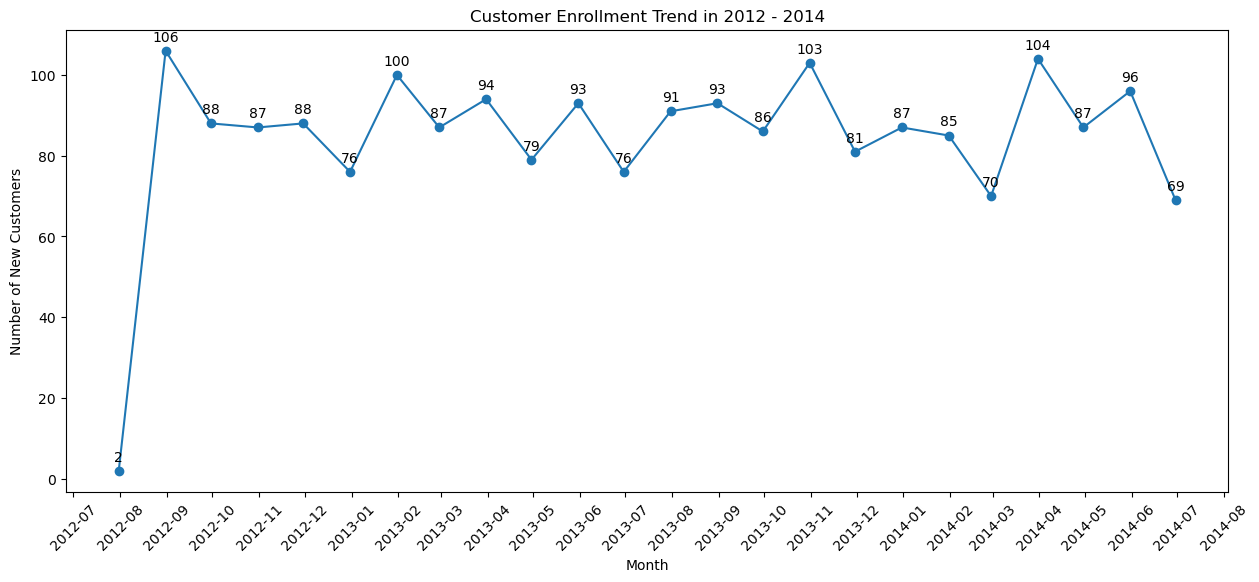

In [127]:
import matplotlib.dates as mdates

month_all = month.loc['2012-01-01':'2014-12-31']

plt.figure(figsize=(15,6))

plt.plot(month_all.index, month_all.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.title('Customer Enrollment Trend in 2012 - 2014')

for i, value in enumerate(month_all.values):
    plt.annotate(str(value), (mdates.date2num(month_all.index[i]), value), textcoords="offset points", xytext=(0,7), ha='center')

plt.xticks(ticks=month_all.index, labels=[x.strftime('%Y-%m') for x in month_all.index], rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.show()

* **The line chart reveals a varied distribution of memberships across different months. 
No single month dominates in terms of new joinings. Certain months show slightly higher membership rates. 
This could be influenced by seasonal trends or specific marketing activities that might make joining more attractive during these times.**

#### **Checking the complaint rate**

In [128]:
df_2= df['Complain'].replace({0: 'not complain', 1: 'complain'})

In [129]:
color_scale = alt.Scale(domain=['not complain', 'complain'],
                        range=['grey', 'red']
)

In [130]:
comp = df_2.value_counts(normalize=True).to_frame().reset_index()
comp.rename(columns={'index': 'Complain', 'Complain':'pct'}, inplace=True)
comp

,Complain,pct
0,not complain,0.990631
1,complain,0.009369


In [131]:
# Membuat basis grafik
base = alt.Chart(comp).encode(
    alt.Theta("pct").stack(True),
    alt.Color("Complain")
        .title(None)
        .scale(color_scale)
        .legend(orient='left', legendY=20),
    order='pct',
)

# Membuat grafik pie
pie = base.mark_arc(outerRadius=120)

# Membuat teks persentase
pct = base.mark_text(radius=150, size=15).encode(
    text=alt.Text('pct', format='.0%'),)


# Menggabungkan chart dengan teks
p1=(pie + pct).properties(
    title=alt.Title(
        'Customer Complain Proportion',
        subtitle='2012-2014',
        anchor='middle',
        font='Calibri',
        fontSize=18
    ),
    width=400, height=300
)
p1

alt.LayerChart(...)

* **From the proportion of the Pie Chart above, it can be seen that the result is 1% who have filled a complaint.
This means that the service provided by the supermarket is good so that very few customers complain.**

* **Even if the number is small, it is still important to analyze existing complaints to gain insight into which aspects may need improvement.**

#### **RFM Analysis**


RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. It helps businesses identify and target specific groups of customers with personalized marketing strategies. Here is the [link](https://www.optimove.com/resources/learning-center/rfm-segmentation#:~:text=RFM%20segmentation%20is%20a%20marketing,targeted%20and%20personalized%20marketing%20strategies.) to see more.

In [132]:
# New Dataset
df_rfm = df[['ID','Recency','Freq_Purchase','Total_Amount']]
df_rfm.rename(columns={'ID': 'Customer ID', 'Recency': 'Recency', 'Freq_Purchase': 'Frequency', 'Total_Amount': 'Monetary'}, inplace=True)
df_rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,5524,58,22,1617
1,2174,38,4,27
2,4141,26,20,776
3,6182,26,6,53
4,5324,94,14,422


In [133]:
df['Recency'].describe()

count    2028.000000
mean       48.848126
std        28.978338
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

In [134]:
# Rank for every RFM
df_rfm['R Rank'] = df_rfm['Recency'].rank(ascending = False, method = 'dense')
df_rfm['F Rank'] = df_rfm['Frequency'].rank(ascending = True, method = 'dense')
df_rfm['M Rank'] = df_rfm['Monetary'].rank(ascending = True, method = 'dense')

df_rfm.sort_values(by='Recency').head()

,Customer ID,Recency,Frequency,Monetary,R Rank,F Rank,M Rank
1089,7348,0,16,1192,100.0,17.0,732.0
1200,837,0,8,174,100.0,9.0,155.0
23,4047,0,17,544,100.0,18.0,387.0
2201,10968,0,22,704,100.0,23.0,463.0
1028,10175,0,4,22,100.0,5.0,17.0


In [135]:
# Rank RFM of Customer ID
dk = df_rfm[['Customer ID','R Rank','F Rank','M Rank']]
dk.head()

,Customer ID,R Rank,F Rank,M Rank
0,5524,42.0,23.0,902.0
1,2174,62.0,5.0,22.0
2,4141,74.0,21.0,500.0
3,6182,74.0,7.0,48.0
4,5324,6.0,15.0,319.0


In [136]:
# Scoring RFM
r_quartiles = pd.qcut(dk['R Rank'],4, labels = range(4,0,-1)) #berurutan dari 4 (kuartil teratas) hingga 1 (kuartil terbawah), reversed the numbers for Recency because lower Recency is better.
f_quartiles = pd.qcut(dk['F Rank'],4, labels = range(1,5))
m_quartiles = pd.qcut(dk['M Rank'],4, labels = range(1,5)) #berurutan dari 1 (kuartil terbawah) hingga 4 (kuartil teratas).

dk_ = dk.assign(R=r_quartiles, F=f_quartiles, M=m_quartiles)
dk_.head()

,Customer ID,R Rank,F Rank,M Rank,R,F,M
0,5524,42.0,23.0,902.0,3,4,4
1,2174,62.0,5.0,22.0,2,1,1
2,4141,74.0,21.0,500.0,2,4,3
3,6182,74.0,7.0,48.0,2,1,1
4,5324,6.0,15.0,319.0,4,3,3


In [137]:
dk_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2028 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Customer ID  2028 non-null   int64   
 1   R Rank       2028 non-null   float64 
 2   F Rank       2028 non-null   float64 
 3   M Rank       2028 non-null   float64 
 4   R            2028 non-null   category
 5   F            2028 non-null   category
 6   M            2028 non-null   category
dtypes: category(3), float64(3), int64(1)
memory usage: 85.5 KB


In [138]:
# changing to Integer
dk_['RFM_SCORE'] = dk_['R'].astype(int) + dk_['F'].astype(int) + dk_['M'].astype(int)

In [139]:
dk_['RFM_SCORE'].describe()

count    2028.000000
mean        7.443787
std         2.476390
min         3.000000
25%         5.000000
50%         8.000000
75%         9.000000
max        12.000000
Name: RFM_SCORE, dtype: float64

In [140]:
# Labelling Score
def segment(dk_) :
    if dk_['RFM_SCORE'] >= 8 :
        return 'Loyal Customer'
    elif (dk_['RFM_SCORE'] >= 6) and (dk_['RFM_SCORE'] < 8) :
        return 'Potential Loyalists Customer'
    elif (dk_['RFM_SCORE'] >= 4) and (dk_['RFM_SCORE'] < 6) :
        return 'New Customer'
    else :
        return 'Potential Lost Customer'
    

dk_['Segment'] = dk_.apply(segment, axis=1)

dk_.head()

,Customer ID,R Rank,F Rank,M Rank,R,F,M,RFM_SCORE,Segment
0,5524,42.0,23.0,902.0,3,4,4,11,Loyal Customer
1,2174,62.0,5.0,22.0,2,1,1,4,New Customer
2,4141,74.0,21.0,500.0,2,4,3,9,Loyal Customer
3,6182,74.0,7.0,48.0,2,1,1,4,New Customer
4,5324,6.0,15.0,319.0,4,3,3,10,Loyal Customer


In [141]:
pseg = dk_['Segment'].value_counts(normalize=True).to_frame().reset_index()
pseg.rename(columns={'index': 'Segment', 'Segment':'pct'}, inplace=True)
pseg

,Segment,pct
0,Loyal Customer,0.509862
1,Potential Loyalists Customer,0.237673
2,New Customer,0.195759
3,Potential Lost Customer,0.056706


In [142]:
color_scale = alt.Scale(domain=['Loyal Customer', 'Potential Loyalists Customer', 'New Customer', 'Potential Lost Customer'],
                        range=['brown', 'teal', 'lightblue', 'orange']
)

In [143]:
base = alt.Chart(pseg).encode(
    alt.Theta("pct").stack(True),
    alt.Color("Segment")
        .title(None)
        .scale(color_scale)
        .legend(orient='left', legendY=25),
    order='pct',
)

# Membuat grafik pie
pie = base.mark_arc(outerRadius=140)

# Membuat teks persentase
pct = base.mark_text(radius=155, size=15).encode(
    text=alt.Text('pct', format='.0%'),)


# Menggabungkan chart dengan teks
p2=(pie + pct).properties(
    title=alt.Title(
        'RFM Analysis Proportion',
        subtitle='2012-2014',
        anchor='middle',
        font='Calibri',
        fontSize=18
    ),
    width=400, height=300
)
p2

alt.LayerChart(...)

From pie chart above, we can see:

1. Loyal Customers (51%%): This segment shows that Supermarket have a loyal customer that made recent, frequent, and high-value purchases. This is a good indicator and shows that the supermarket's customer retention strategy is quite effective. It’s important to reward them for their loyalty as they can become early adopters for new products and help promote the brand.

2. Potential Loyalists Customer (24%): This segment is also quite large, indicating that supermarkets have many customers who buy at Supermarket with quite high frequency and quantity. These are customers who will likely become "Loyal Customers" if managed properly such as consider offering them membership or loyalty programs or recommending related products to upsell.

3. New Customers (20%): These are customers with a quite high RFM score but not frequent shoppers. To build a relationship with them, provide onboarding support and special offers to increase their visits.

4. Potential Lost Customer (6%): These are customers who frequently visit and purchase but haven't visited recently.


In [159]:
# save to csv format
dk_.to_csv('data_RFM.csv')
# save to xlsx format
dk_.to_excel('data_RFM.xlsx')

---

### *`CONCLUSION`*

1. What insights can we gain regarding customer purchasing behavior based on their demographic information?

   - The majority of Supermarket customers are in the 'Gen X' generation (born around year 1946 to 1964) with 48%, educational background of Graduation (50%) levels. Most customers predominantly belong to the Middle (around 30,000-60,000) with 46% income categories and have a family member of one (40%) or two members (34%).
   
   - Consumer profiles based on total amount spend and purchasing frequency:
     - Generation: The 'Silent Gen' (Born before year 1946) generation have the highest spending amounts and purchase frequency.
     - Education Level: Customers with 'PhD' educational backgrounds have the highest spending and purchasing frequency, followed by 'Graduation' level.
     - Income Category: The 'Very High' (above 90,000) category dominates in terms of both purchase frequency and spending amounts.
     - Family Quantity: Customers with a family size of one have the highest spending amounts and purchase frequency.
   
   - Product preferences based on customer demographics:
     - Generation: Wine and meat emerges as the most dominant product across all generation categories.
     - Education Level: Wine and meat dominates customers with 'PhD', 'Graduation' and 'Master' level. Gold appears to be the most frequently purchased product for 'Basic' level.
     - Income Category: Wine and meat are the primary products purchased by the 'Middle', 'High, and 'Very High' categories. For the 'Low' category, spending on meat and gold is higher compared to wine,
     - Family Quantity: In larger family of 2, 3, 4, and 5 members wine, meat, and gold products appear to be the primary purchases. Family with 1 member is the most purchases all product. 
     
   - Purchase references based on customer demographics:
     - Generation: All references purchases in 'Silent Gen' largest across each generations.
     - Education Level: In-store purchasing is the highest reference in each category, followed by purchases from the website.
     - Income Category: In-store purchasing is the dominant reference in all category.
     - Family Quantity: The interest in catalogue purchases is highest among single customers and decreases as family size increases.

   - Respons to deals based on customer demographics:
     - Generation: 'Baby Boomer' and 'Gen X' individuals seem to purchase deals compared to 'Silent Gen' and 'Millennials.
     - Education Level: Customers with 'PhD', 'Graduation' and 'Master' level tend to purchase more deals.
     - Income Category: 'Low' and 'Middle' tend to purchase more deals compared to 'High' and 'Very High' categories.
     - Family Quantity: The number of deals purchased seems to slightly increase as the family member increase, with some variation.

   - Campaign acceptance based on customer demographics:
     - Generation: 'Gen X' dominates the acceptance campaign. The 'Silent Gen' group showed little interest in all campaigns.
     - Education Level: 'Graduation' level dominates the acceptance campaign. Basic education categories have minimal to no participation.
     - Income Category: Category 'High' dominates the acceptance campaign. Similar trends are observed in other campaigns, where the 'Middle' and 'High' categories seem to be the primary target audience showing interest.
     - Family Quantity: Family with 2 members dominates the acceptance campaign. There's a decline in acceptance as the family size increases.

2. What potential areas can be developed or improved for future campaigns and sales?
   - The most popular products are Wine and Meat, which are the largest contributors to Supermaket's product offerings.
   - The most common purchasing channel is in-store.
   - Most Effective Campaign is'Latest_Cmp' and the less is 'AcceptedCmp2'.

3. How does the Supermarket perform in building its marketing strategy?
   - Consumer visits to Supermarket remain relatively stable every month.
   - There is 1% who have filled a complaint, it's means that the service provided by the supermarket is good so that very few customers complain.
   - **RFM Analysis**: The majority of Supermarket Customers are 'Loyal Customer' and 'Potential Loyalists Customer' indicating that the Supermarket has a strong and loyal customer base.
   
---

### *`RECOMMENDATIONS`*

1. Currently, the people who buy the most products are the Silent Generation, even though the majority of Supermarket customers are the Gen X generation. Therefore, it would be better if the Gen X generation could be paid more attention to.

2. Currently, the Gen X generation is the generation that receives the most campaigns. This is a good thing because the Gen X generation is Supermarket's future loyal customers. Therefore, latest media campaign is the most suitable because it is more in line with the interests of the Gen X generation.

3. Currently, the people who buy the most products and buy the most products are people who live alone. Even though the majority of Supermarket customers have 2 family members also. So it would be better if we added a new product segment that focuses on household needs.

4. The majority of Supermarket customers are Middle category. However, those who buy products often and a lot are only Very High customers. Therefore, it would be better if there was a new product segment with a slightly cheaper price range to attract the attention of lower income category customers.

5. The best-selling product liked by Supermarket customers is wine, therefore we can focus on adding to the types of wine menu that we already have.

6. The main platform for sales at Supermarket is to shop directly at the store. Therefore opening a new shop outlet in a strategic location is a good idea and it's essential to capitalize on this preference by enhancing the in-store experience involve store layout improvements, interactive displays, and staff training to create an engaging and memorable visit for customers. 

7. Purchasing via the website is quite good, but it feels like it's still not optimal. It would be better to optimize the website so that it can attract more customers online. Also, catalogue purchases could be a strategy to target customers with smaller family quantity.

8. Don't ever do campaign method no. 2 again because it has a bad impression on Supermarket customers. it's better to use campaign latest method because it is liked by many Supermarket customers.

10. The customer segment rate is good because shows that Supermarket have a loyal customer that made recent, frequent, and high-value purchases. However there is still the potential for losing customers, so to bring them back, offer relevant promotions and run surveys to find out what went wrong and avoid losing them to competitors.